# 모듈 설치

In [2]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 설정
plt.rcParams['figure.figsize'] = (10, 6) # 그래프 크기 설정

In [4]:
import warnings
warnings.filterwarnings('ignore') # 경고창 숨기기

# 국민건강보험공단_건강검진정보_2022_09 분석

건강검진 결과지 제대로 읽는 법


https://health.chosun.com/site/data/html_dir/2016/11/30/2016113001291.html

In [5]:
url1="https://raw.githubusercontent.com/KimYounghwan/bigdata/master/%EA%B5%AD%EB%AF%BC%EA%B1%B4%EA%B0%95%EB%B3%B4%ED%97%98%EA%B3%B5%EB%8B%A8_%EA%B1%B4%EA%B0%95%EA%B2%80%EC%A7%84%EC%A0%95%EB%B3%B4_20211229_1.CSV"
url2="https://raw.githubusercontent.com/KimYounghwan/bigdata/master/%EA%B5%AD%EB%AF%BC%EA%B1%B4%EA%B0%95%EB%B3%B4%ED%97%98%EA%B3%B5%EB%8B%A8_%EA%B1%B4%EA%B0%95%EA%B2%80%EC%A7%84%EC%A0%95%EB%B3%B4_20211229_2.CSV"
url3="https://raw.githubusercontent.com/KimYounghwan/bigdata/master/%EA%B5%AD%EB%AF%BC%EA%B1%B4%EA%B0%95%EB%B3%B4%ED%97%98%EA%B3%B5%EB%8B%A8_%EA%B1%B4%EA%B0%95%EA%B2%80%EC%A7%84%EC%A0%95%EB%B3%B4_20211229_3.CSV"
url4="https://raw.githubusercontent.com/KimYounghwan/bigdata/master/%EA%B5%AD%EB%AF%BC%EA%B1%B4%EA%B0%95%EB%B3%B4%ED%97%98%EA%B3%B5%EB%8B%A8_%EA%B1%B4%EA%B0%95%EA%B2%80%EC%A7%84%EC%A0%95%EB%B3%B4_20211229_4.CSV"

In [6]:
import pandas as pd

검진정보1=pd.read_csv(url1)
검진정보2=pd.read_csv(url2)
검진정보3=pd.read_csv(url3)
검진정보4=pd.read_csv(url4)

## 건강검진정보 데이터 

- 건강검진정도 데이터는 총 100,0000개이고, 변수는 31개입니다. 

    - 날짜, ID 변수(2개): 기준년도, 일련번호.
    
    - 범주형 변수(8개):   시도코드, 성별코드, 연령대 코드(5세 단위), 흡연상태, 음주여부, 구강검진수여부, 
                          치아 우식증 유무, 치석.
                        
    - 연속형 변수(20개) : 신장(5Cm단위), 체중(5Kg 단위), 허리둘레, 시력(좌), 시력(우), 청력(좌), 
                          청력(우), 수축기 혈압, 이완기 혈압, 식전혈당(공복혈당), 총 콜레스테롤,
                          트리글리세라이드, HDL 콜레스테롤, LDL 콜레스테롤, 혈색소, 요단백, 
                          혈청크레아티닌, (혈청지오티)AST, (혈청지오티)ALT, 감마 지티피.
                   

In [7]:
# 검진정보 = 검진정보1.append(검진정보2).append(검진정보3).append(검진정보4)
df =  pd.concat([검진정보1,검진정보2,검진정보3,검진정보4,])
df.reset_index(drop=True, inplace = True)
df.drop(columns="데이터 공개일자", inplace=True)
print(df.shape)
display(df.head())

(1000000, 30)


,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석
0,2020,1,36,1,9,165,60,72.1,1.2,1.5,...,1.0,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN
1,2020,2,27,2,13,150,65,81.0,0.8,0.8,...,1.0,0.5,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN
2,2020,3,11,2,12,155,55,70.0,0.6,0.7,...,1.0,0.7,27.0,25.0,7.0,1.0,0.0,0,NaN,NaN
3,2020,4,31,1,13,160,70,90.8,1.0,1.0,...,1.0,1.2,65.0,97.0,72.0,1.0,0.0,1,0.0,0.0
4,2020,5,41,2,12,155,50,75.2,1.5,1.2,...,1.0,0.7,18.0,17.0,14.0,1.0,0.0,0,NaN,NaN


In [8]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 30 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자 일련번호      1000000 non-null  int64  
 2   시도코드          1000000 non-null  int64  
 3   성별코드          1000000 non-null  int64  
 4   연령대 코드(5세단위)  1000000 non-null  int64  
 5   신장(5Cm단위)     1000000 non-null  int64  
 6   체중(5Kg 단위)    1000000 non-null  int64  
 7   허리둘레          999892 non-null   float64
 8   시력(좌)         999743 non-null   float64
 9   시력(우)         999748 non-null   float64
 10  청력(좌)         999778 non-null   float64
 11  청력(우)         999770 non-null   float64
 12  수축기 혈압        992468 non-null   float64
 13  이완기 혈압        992466 non-null   float64
 14  식전혈당(공복혈당)    992398 non-null   float64
 15  총 콜레스테롤       402306 non-null   float64
 16  트리글리세라이드      402322 non-null   float64
 17  HDL 콜레스테롤     402315 non-nul

None

# 데이터 전처리

## 변수 타입 변경

현재 건강검진 데이터의 변수 속성을 살펴보면 범주형 변수가 정수 또는 실수로 입력된 것을 확인 할 수 있습니다. 이를 범주형 변수의 데이터 타입을 문자로 변경하는 데이터 전처리를 진행하였습니다. 


In [9]:
# 범주형 변수의 데이터 타입 변경
df["기준년도"] = df["기준년도"].astype("object")
df["가입자 일련번호"] = df["가입자 일련번호"].astype("object")
df["시도코드"] = df["시도코드"].astype("object")
df["성별코드"] = df["성별코드"].astype("object")
df["연령대 코드(5세단위)"] = df["연령대 코드(5세단위)"].astype("object")
df["흡연상태"] = df["흡연상태"].astype("object")
df["음주여부"] = df["음주여부"].astype("object")
df["구강검진 수검여부"] = df["구강검진 수검여부"].astype("object")
df["치아우식증유무"] = df["치아우식증유무"].astype("object")
df["치석"] = df["치석"].astype("object")

In [10]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 30 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  object 
 1   가입자 일련번호      1000000 non-null  object 
 2   시도코드          1000000 non-null  object 
 3   성별코드          1000000 non-null  object 
 4   연령대 코드(5세단위)  1000000 non-null  object 
 5   신장(5Cm단위)     1000000 non-null  int64  
 6   체중(5Kg 단위)    1000000 non-null  int64  
 7   허리둘레          999892 non-null   float64
 8   시력(좌)         999743 non-null   float64
 9   시력(우)         999748 non-null   float64
 10  청력(좌)         999778 non-null   float64
 11  청력(우)         999770 non-null   float64
 12  수축기 혈압        992468 non-null   float64
 13  이완기 혈압        992466 non-null   float64
 14  식전혈당(공복혈당)    992398 non-null   float64
 15  총 콜레스테롤       402306 non-null   float64
 16  트리글리세라이드      402322 non-null   float64
 17  HDL 콜레스테롤     402315 non-nul

None

## 범주형 변수 변환

In [290]:
# 성별 코드
# 1 - 남자, 2 - 여자 
df["성별코드"] = df["성별코드"].replace({1: "남자", 2 : "여자"})
df["성별코드"].value_counts()

남자    510689
여자    489311
Name: 성별코드, dtype: int64

In [291]:
# 연령대 
df["연령대 코드(5세단위)"] = df["연령대 코드(5세단위)"].replace({1: "0세 ~ 4세", 2: "5세 ~ 9세", 3: "10세 ~ 14세", 4: "15세 ~ 19세", 5: "20세 ~ 24세",
                                    6: "25세 ~ 29세", 7: "30세 ~ 34세", 8: "35세 ~ 39세", 9: "40세 ~ 44세", 10:"45세 ~ 49세",
                                    11: "50세 ~ 54세", 12: "55세 ~ 59세", 13: "60세 ~ 64세", 14: "65세 ~ 69세", 15: "70세 ~ 74세",
                                    16: "75세 ~ 79세", 17: "80세 ~ 84세", 18: "85세 이상"})
df["연령대 코드(5세단위)"].value_counts()

50세 ~ 54세    175705
40세 ~ 44세    156277
60세 ~ 64세    155096
45세 ~ 49세    144165
55세 ~ 59세    142089
65세 ~ 69세     86653
70세 ~ 74세     73714
75세 ~ 79세     36663
80세 ~ 84세     23401
85세 이상         6237
Name: 연령대 코드(5세단위), dtype: int64

In [292]:
# 시도코드 
df["시도코드"] = df["시도코드"].replace({11: "서울특별시", 26: "부산광역시", 27:"대구광역시", 28:"인천광역시",
                    29: "광주광역시", 30:"대전광역시", 31: "울산광역시", 36: "세종특별자치시",
                    41: "경기도", 42: "강원도", 43: "충청북도", 44:"충청남도", 45:"전라북도", 
                    46: "전라남도", 47: "경상북도", 48:"경상남도", 49: "제주특별자치도"})
df["시도코드"].value_counts()

경기도        247369
서울특별시      166231
부산광역시       69025
경상남도        68530
인천광역시       58345
경상북도        54438
대구광역시       48413
충청남도        42582
전라북도        38066
전라남도        38041
충청북도        34009
강원도         32023
대전광역시       30057
광주광역시       28532
울산광역시       26001
제주특별자치도     11878
세종특별자치시      6460
Name: 시도코드, dtype: int64

In [295]:
# 음주여부
df["음주여부"] = df["음주여부"].replace({0: "마시지 않음" , 1: "마심"})
print(df["음주여부"].value_counts())

마심        584685
마시지 않음    415119
Name: 음주여부, dtype: int64


# 비만도 분석 

## 비만도 데이터 확인

BMI값 도출에 필요한 체중 및 신장의 결측값을 제거합니다.

In [296]:
# 변수 값 확인 
print(df['체중(5Kg 단위)'].describe())
print()

print(df["신장(5Cm단위)"].describe())
print()

# 결측값 확인 및 삭제 
print("결측값:", df["체중(5Kg 단위)"].isna().sum() + df["신장(5Cm단위)"].isna().sum() )
print()

df1 = df[ df["체중(5Kg 단위)"].notna()]
df1 = df[ df["신장(5Cm단위)"].notna()]
print("결측값 제거:", df1.shape[0])

count    1000000.000000
mean          63.060790
std           12.269907
min           30.000000
25%           55.000000
50%           60.000000
75%           70.000000
max          135.000000
Name: 체중(5Kg 단위), dtype: float64

count    1000000.000000
mean         160.964085
std            9.197899
min          130.000000
25%          155.000000
50%          160.000000
75%          170.000000
max          195.000000
Name: 신장(5Cm단위), dtype: float64

결측값: 0

결측값 제거: 1000000


## 비만도 변수 생성

BMI를 계산해 저체중, 정상체중, 과체중, 경도비만, 중정도비만, 고도비만으로 비만도를 구합니다.


In [297]:
# BMI = 체중/((신장/100)**2)
df1['BMI'] =  df1['체중(5Kg 단위)']/ ((df1['신장(5Cm단위)']/100)**2)

def bmi_check(bmi):
    if bmi < 18.5 : 
        return 1
    elif bmi < 23 : 
        return 2
    elif bmi < 25 : 
        return 3
    elif bmi < 30 : 
        return 4
    elif bmi < 35 : 
        return 5
    else : 
        return 6
        
df1['비만도'] = df1['BMI'].apply(bmi_check)
df1['비만도'].value_counts()

ob = {1:'저체중', 2: '정상체중', 3: '과체중', 4: '경도비만', 5:'중정도비만', 6:'고도비만'}

## 성별, 연령대에 따른 비만도 지수

성별과 연령대에 따른 BMI 지수의 평균을 조사한 결과, 40세 부터 69세의 경우, 남성의 BMI가 월등히 높으나,  
70세부터 84세의 경우, 여성의 BMI가 남성보다 높게 나타나는 경향을 보였다. 

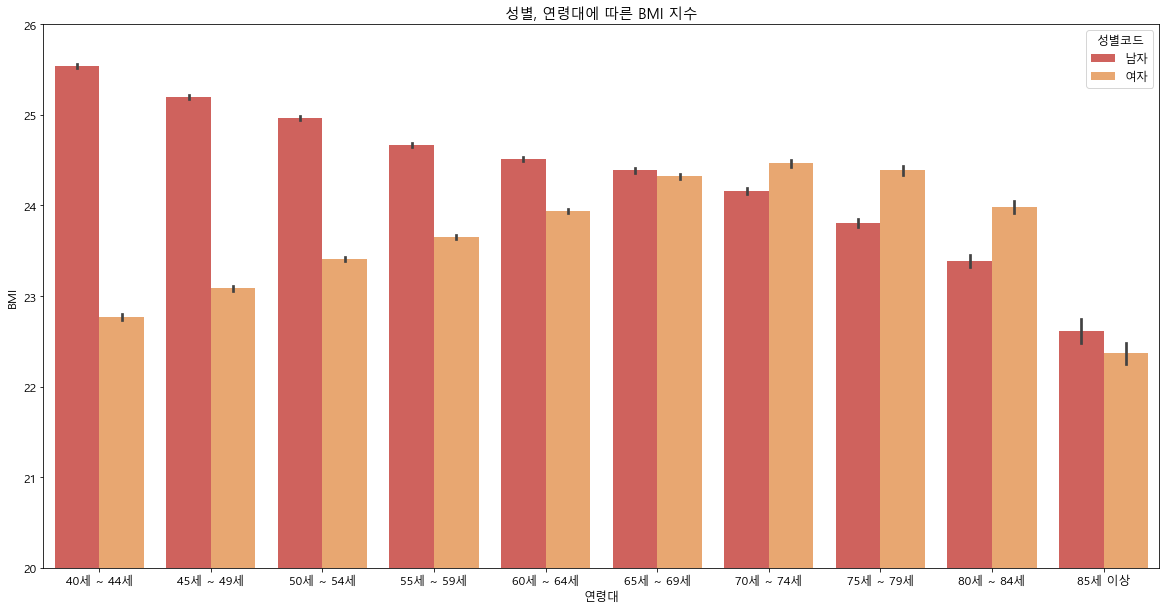

In [279]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 설정
plt.rcParams['figure.figsize'] = (10, 6) # 그래프 크기 설정

plt.figure(figsize=(20,10))

sns.barplot(
    data = df1.sort_values(by='연령대 코드(5세단위)'),
    x = '연령대 코드(5세단위)',
    y = 'BMI',
    hue = '성별코드'
)

plt.xlabel('연령대')
plt.ylim((20,26))
plt.title('성별, 연령대에 따른 BMI 지수')
plt.show()

## 성별, 연령대에 따른 비만도 비율

연령, 성별, 비만도에 따른 인구를 계산하고, 전체에 대한 비율을 도출했다.

초록, 파랑, 보라는 각각 경도, 중정도, 고도 비만이며, 이를 통해 74세 이하는 여성이, 75세 이상은 남성이 비만인 경우가 더 많다.

In [281]:
# 데이터 생성
df2 = df1.groupby(['연령대 코드(5세단위)', '성별코드'])['BMI'].agg(['count']).reset_index()
df3 = pd.DataFrame()
df3['남자']=df2[df2['성별코드']=='남자']['count'].values
df3['여자']=df2[df2['성별코드']=='여자']['count'].values
df3['연령대']=df['연령대 코드(5세단위)'].unique()
df4 = df1.groupby(['연령대 코드(5세단위)', '성별코드', '비만도'])['BMI'].agg(['count']).reset_index()
df4.sort_values(by=['연령대 코드(5세단위)','성별코드','비만도'], ascending=[False,True,True]) 
df5 = pd.merge(df4, df2, how='left', on = ['연령대 코드(5세단위)','성별코드'])
df5['count']=df5['count_x']/df5['count_y']

# 성별과 비만도에 따라 dataframe을 나누었다.
df_남_1 = df5.loc[(df5['성별코드']=='남자') & (df5["비만도"] == 1)  ]
df_여_1 = df5.loc[  (df5['성별코드']=='여자') &(df5["비만도"] == 1)  ]
df_남_2 = df5.loc[  (df5['성별코드']=='남자') &(df5["비만도"] == 2)  ]
df_여_2 = df5.loc[  (df5['성별코드']=='여자') &(df5["비만도"] == 2)  ]
df_남_3 = df5.loc[  (df5['성별코드']=='남자') &(df5["비만도"] == 3)  ]
df_여_3 = df5.loc[  (df5['성별코드']=='여자') &(df5["비만도"] == 3)  ]
df_남_4 = df5.loc[  (df5['성별코드']=='남자') &(df5["비만도"] == 4)  ]
df_여_4 = df5.loc[  (df5['성별코드']=='여자') &(df5["비만도"] == 4)  ]
df_남_5 = df5.loc[  (df5['성별코드']=='남자') &(df5["비만도"] == 5)  ]
df_여_5 = df5.loc[  (df5['성별코드']=='여자') &(df5["비만도"] == 5)  ]
df_남_6 = df5.loc[  (df5['성별코드']=='남자') &(df5["비만도"] == 6)  ]
df_여_6 = df5.loc[  (df5['성별코드']=='여자') &(df5["비만도"] == 6)  ]


초록, 파랑, 보라는 각각 경도, 중정도, 고도 비만을 의미한다.

위에서 구한 비만도 비율로 성별과 연령에 따른 비만도 비율을 구하였다.

저체중의 경우, 대체적으로 남성이 여성보다 많으며, 40대 초반에서 60대후반까지 감소하는 반면, 70대부터 증가한다.
또한 85세 이상에서 가장 큰 비율을 보인다.

정상체중의 경우, 남성이 여성보다 많으며, 40대 남성의 경우 약 50%가 정상체중을 유지한다.
정상체중의 비율은 연령이 증가함에 따라 감소하며, 남녀의 정상체중 비율의 차이가 줄어든다.

과체중의 경우, 각 연령대의 남녀 비율이 매우 유사하며, 연령이 증가함에 따라 감소한다.

경도 비만의 경우, 40대 초반 남성에 비해 여성이 2배이상 많으며, 70대 초반까지 여성이 남성에 비해 많이 분포해있다.
연령이 증가함에 따라 경도비만의 비율이 감소하며, 남녀의 비율 차이가 줄어든다.

중정도 비만과 고도 비만의 경우, 연령이 증가함에 따라 비율이 감소한다.

이를 통해 여성의 비만도가 대체적으로 높으며, 연령이 낮을수록 비만도가 높음을 알 수 있다.




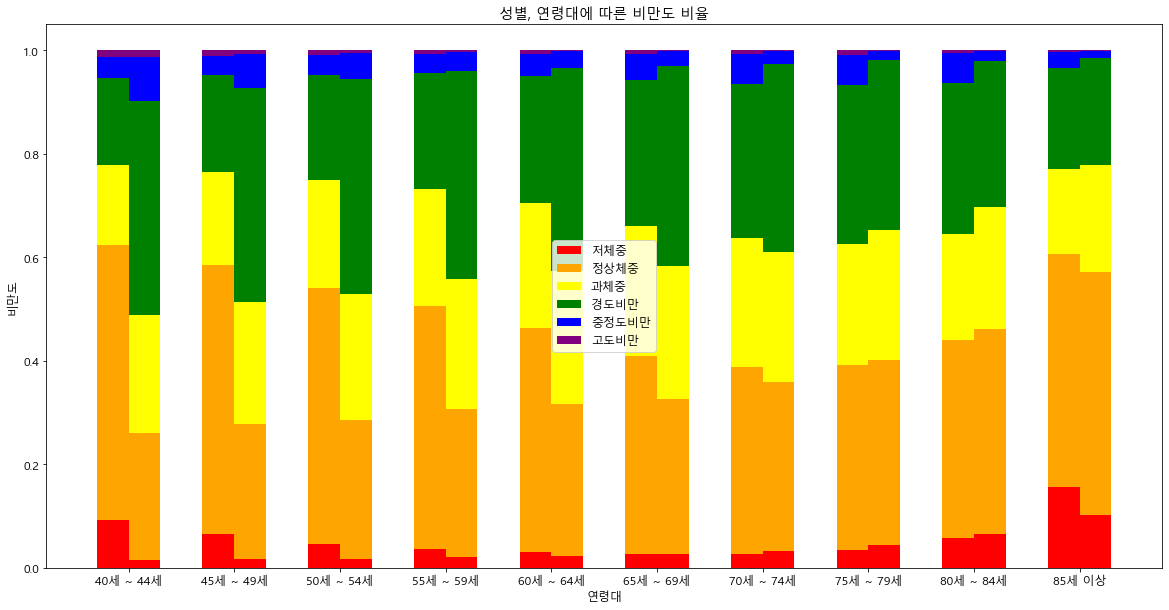

In [302]:
print("""
초록, 파랑, 보라는 각각 경도, 중정도, 고도 비만을 의미한다.

위에서 구한 비만도 비율로 성별과 연령에 따른 비만도 비율을 구하였다.

저체중의 경우, 대체적으로 남성이 여성보다 많으며, 40대 초반에서 60대후반까지 감소하는 반면, 70대부터 증가한다.
또한 85세 이상에서 가장 큰 비율을 보인다.

정상체중의 경우, 남성이 여성보다 많으며, 40대 남성의 경우 약 50%가 정상체중을 유지한다.
정상체중의 비율은 연령이 증가함에 따라 감소하며, 남녀의 정상체중 비율의 차이가 줄어든다.

과체중의 경우, 각 연령대의 남녀 비율이 매우 유사하며, 연령이 증가함에 따라 감소한다.

경도 비만의 경우, 40대 초반 남성에 비해 여성이 2배이상 많으며, 70대 초반까지 여성이 남성에 비해 많이 분포해있다.
연령이 증가함에 따라 경도비만의 비율이 감소하며, 남녀의 비율 차이가 줄어든다.

중정도 비만과 고도 비만의 경우, 연령이 증가함에 따라 비율이 감소한다.

이를 통해 여성의 비만도가 대체적으로 높으며, 연령이 낮을수록 비만도가 높음을 알 수 있다.

""")

plt.figure(figsize=(20,10))

p1 = plt.bar(
    df_남_1['연령대 코드(5세단위)'],
    df_남_1['count'],
    width = 0.3,
    align = 'edge',
    color = 'red',
    label = ob.get(1)
)
p2 = plt.bar(
    df_남_2['연령대 코드(5세단위)'],
    df_남_2['count'],
    width = 0.3,
    align = 'edge',
    bottom = df_남_1['count'].values,
    color= 'orange',
    label = ob.get(2)
)
p3 = plt.bar(
    df_남_3['연령대 코드(5세단위)'],
    df_남_3['count'],
    width = 0.3,
    align = 'edge',
    bottom =  df_남_1['count'].values+df_남_2['count'].values,
    color = 'yellow',
    label = ob.get(3)
)
p4 = plt.bar(
    df_남_4['연령대 코드(5세단위)'],
    df_남_4['count'],
    width = 0.3,
    align = 'edge',
    bottom = df_남_1['count'].values+df_남_2['count'].values+df_남_3['count'].values,
    color = 'green',
    label = ob.get(4)
)
p5 = plt.bar(
    df_남_5['연령대 코드(5세단위)'],
    df_남_5['count'],
    width = 0.3,
    align = 'edge',
    bottom = df_남_1['count'].values+df_남_2['count'].values+df_남_3['count'].values+df_남_4['count'].values,
    color = 'blue',
    label = ob.get(5)
)
p6 = plt.bar(
    df_남_6['연령대 코드(5세단위)'],
    df_남_6['count'],
    width = 0.3,
    align = 'edge',
    bottom = df_남_1['count'].values+df_남_2['count'].values+df_남_3['count'].values+df_남_4['count'].values+df_남_5['count'].values,
    color = 'purple',
    label = ob.get(6)
)

p7 = plt.bar(
    df_여_1['연령대 코드(5세단위)'],
    df_여_1['count'],
    width = -0.3,
    align = 'edge',
    color = 'red'
)
p8 = plt.bar(
    df_여_2['연령대 코드(5세단위)'],
    df_여_2['count'],
    width = -0.3,
    align = 'edge',
    bottom = df_여_1['count'].values,
    color= 'orange'
)
p9 = plt.bar(
    df_여_3['연령대 코드(5세단위)'],
    df_여_3['count'],
    width = -0.3,
    align = 'edge',
    bottom =  df_여_1['count'].values+df_여_2['count'].values,
    color = 'yellow'
)
p10 = plt.bar(
    df_여_4['연령대 코드(5세단위)'],
    df_여_4['count'],
    width = -0.3,
    align = 'edge',
    bottom = df_여_1['count'].values+df_여_2['count'].values+df_여_3['count'].values,
    color = 'green'
)
p11 = plt.bar(
    df_여_5['연령대 코드(5세단위)'],
    df_여_5['count'],
    width = -0.3,
    align = 'edge',
    bottom = df_여_1['count'].values+df_여_2['count'].values+df_여_3['count'].values+df_여_4['count'].values,
    color = 'blue'
)
p12 = plt.bar(
    df_여_6['연령대 코드(5세단위)'],
    df_여_6['count'],
    width = -0.3,
    align = 'edge',
    bottom = df_여_1['count'].values+df_여_2['count'].values+df_여_3['count'].values+df_여_4['count'].values+df_여_5['count'].values,
    color = 'purple'
)
plt.legend()
plt.xlabel('연령대')
plt.ylabel('비만도')
plt.title('성별, 연령대에 따른 비만도 비율')

#plt.xticks([0,5,10,15,20,25,30,35,40,45], label = df5['연령대 코드(5세단위)'])
plt.show()

## 비만도와 고혈압의 관계 비교

비만과 고혈압의 상관관계를 그래프로 나타낸 결과,  
고혈압일 때 비만인 확률은 약 56.5%인데 비해, 비만일 때 고혈압일 확률은 약 75%에 달한다.  
따라서 비만일 경우 고혈압이 생길 위험이 높다.

In [299]:
# 고혈압 및 비만도 변수 생성
df1_1 = df1[ df1["수축기 혈압"].notna()]
df1_1 = df1[ df1["이완기 혈압"].notna()]

idx1 = df1_1[ (df1_1['수축기 혈압']>=140) & ( df1_1['이완기 혈압'] >=90) ].index
idx2 = df1_1[ ((df1_1['수축기 혈압']>=120) & ( df1_1['수축기 혈압'] <=139)) | ((df1_1['이완기 혈압']>=80) & ( df1_1['이완기 혈압'] <=89)) ].index
df1_1["고혈압진단"]= '정상'

df1_1.loc[ idx1, "고혈압진단" ] = '고혈압'
df1_1.loc[ idx2, "고혈압진단" ] = '고혈압 의심'

# 비만도 (4,5,6) & 고혈압 의심+고혈압
df2 = df1_1.loc[df1_1['비만도']>3]
df3 = df1_1.loc[df1_1['비만도']<=3]

# 남녀 / 연령 / 비만 / 고혈압
# 비만 중 고혈압
비만_고혈압 = len(df2[df2['고혈압진단']!='정상'])/len(df2)
# 비만 중 고혈압 x
비만_고혈압x = len(df2[df2['고혈압진단']=='정상'])/len(df2)

# 비만 x 중 고혈압
비만x_고혈압 = len(df3[df3['고혈압진단']!='정상'])/len(df3) 
# 비만 x 중 고혈압 x
비만x_고혈압x = len(df3[df3['고혈압진단']=='정상'])/len(df3)

ob_bp = [비만_고혈압, 비만_고혈압x, 비만x_고혈압, 비만x_고혈압x]


비만과 고혈압의 비율을 그래프로 나타낸 결과,  
고혈압일 때 비만인 확률은 약 56.5%인데 비해, 비만일 때 고혈압일 확률은 약 75%에 달한다.  
따라서 비만일 경우 고혈압이 생길 위험이 높다.




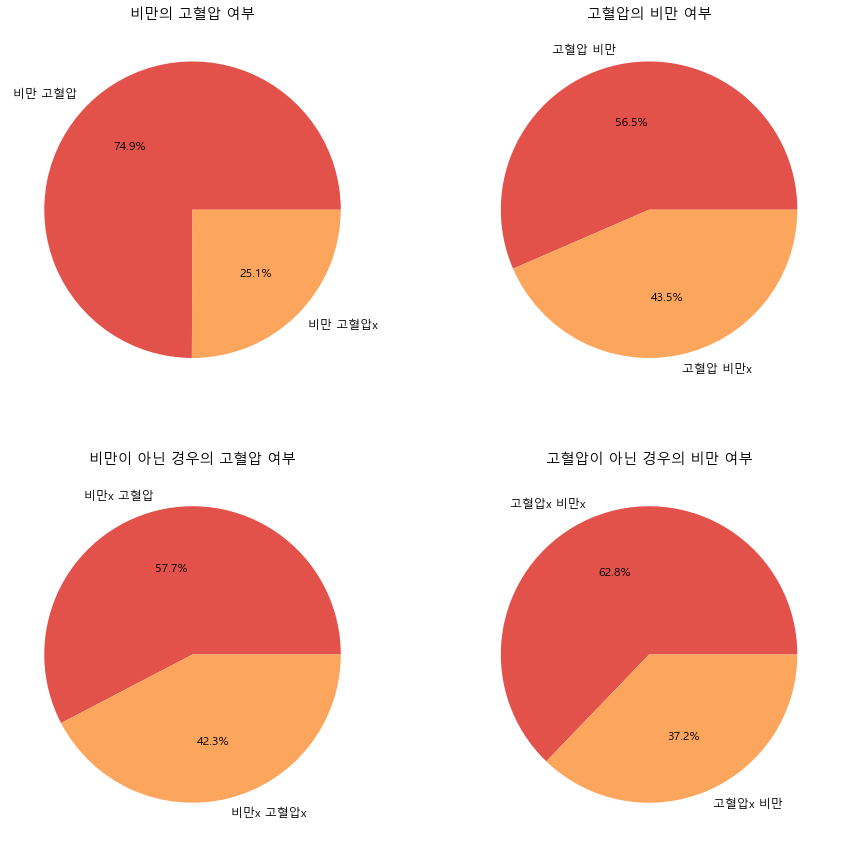

In [301]:
print("""
비만과 고혈압의 비율을 그래프로 나타낸 결과,  
고혈압일 때 비만인 확률은 약 56.5%인데 비해, 비만일 때 고혈압일 확률은 약 75%에 달한다.  
따라서 비만일 경우 고혈압이 생길 위험이 높다.

""")
ob1 = [비만_고혈압, 비만_고혈압x]
ob2 = [비만_고혈압, 비만x_고혈압]
ob3 = [비만x_고혈압, 비만x_고혈압x]
ob4 = [비만x_고혈압x, 비만_고혈압x]

plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.pie(
    ob1,
    labels=['비만 고혈압', '비만 고혈압x'],
    autopct='%.1f%%',
)
plt.title('비만의 고혈압 여부')

plt.subplot(2,2,2)
plt.pie(
    ob2,
    labels=['고혈압 비만', '고혈압 비만x'],
    autopct='%.1f%%'
)
plt.title('고혈압의 비만 여부')

plt.subplot(2,2,3)
plt.pie(
    ob3,
    labels=['비만x 고혈압', '비만x 고혈압x'],
    autopct='%.1f%%'
)
plt.title('비만이 아닌 경우의 고혈압 여부')

plt.subplot(2,2,4)
plt.pie(
    ob4,
    labels=['고혈압x 비만x', '고혈압x 비만'],
    autopct='%.1f%%'
)
plt.title('고혈압이 아닌 경우의 비만 여부')

plt.show()

# 고혈압 분석


## 고혈압 데이터 확인

- 변수 확인
    - 수축기 혈압: 최소값 64 평균 124 최대값 260.
    - 이완기 혈압: 최소값 30 평균 76 최대값 190.
    - 결측값 개수 : 15066, 삭제한 데이터 992466 사용.

In [105]:
# 데이터 확인
print(df["수축기 혈압"].describe())
print()
print(df["이완기 혈압"].describe())
print()

# 결측값 확인 및 삭제 
print("결측값:", df["수축기 혈압"].isna().sum() + df["이완기 혈압"].isna().sum() )
print()

df2 = df[ df["수축기 혈압"].notna()]
df2 = df[ df["이완기 혈압"].notna()]
print("결측값 제거:", df2.shape[0])
print()

count    992468.000000
mean        124.831874
std          14.751504
min          64.000000
25%         115.000000
50%         124.000000
75%         134.000000
max         260.000000
Name: 수축기 혈압, dtype: float64

count    992466.000000
mean         76.815972
std           9.990877
min          30.000000
25%          70.000000
50%          77.000000
75%          83.000000
max         190.000000
Name: 이완기 혈압, dtype: float64

결측값: 15066

결측값 제거: 992466



## 고혈압 여부 변수 생성

고혈압을 판단하는 기준은 다음과 같다. 

- 고혈압 여부 변수 생성
    - 정상혈압 : 수축기 혈압 120 미만, 이완기 혈압 80 미만
    - 고혈압 의심 : 수축기 혈압 120 ~ 139, 이완기 80 ~ 89
    - 고혈압 : 수축기 140 이상, 이완기 90 이상

**<고혈압 여부에 따른 검진자들의 분포>**

현재 검진자들의 고혈압 여부를 살펴보면, 고혈압을 진단되는 검진자는 65345명으로 전체의 약 6.6%이고, 고혈압 의심으로 진단되는 검진자는 57.4%이며, 정상 검진자는 36%이다. 
    - 정상 : 36%
    - 고혈압 의심 : 57.4%,
    - 고혈압 : 6.6%

In [106]:
# 고혈압
idx1 = df2[ (df2['수축기 혈압']>=140) & (df2['이완기 혈압'] >=90) ].index
idx2 = df2[ ( (df2['수축기 혈압']>=120) & (df2['수축기 혈압'] <=139)) | ((df2['이완기 혈압']>=80) & ( df2['이완기 혈압'] <=89)) ].index
df2["고혈압진단"]= '정상'

df2.loc[ idx1, "고혈압진단" ] = '고혈압'
df2.loc[ idx2, "고혈압진단" ] = '고혈압 의심'

print('검진자들의 고혈압 빈도')
print(df2['고혈압진단'].value_counts())
print()

print('검진자들의 고혈압 퍼센트')
print(df2['고혈압진단'].value_counts() / 992466 * 100)

C:\Users\Admin\AppData\Local\Temp\ipykernel_2612\1397447377.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["고혈압진단"]= '정상'


검진자들의 고혈압 빈도
고혈압 의심    569744
정상        357377
고혈압        65345
Name: 고혈압진단, dtype: int64

검진자들의 고혈압 퍼센트
고혈압 의심    57.406904
정상        36.008992
고혈압        6.584105
Name: 고혈압진단, dtype: float64



현재 검진자들의 고혈압 여부를 살펴보면, 
고혈압을 진단되는 검진자는 65345명으로 전체의 약 6.6%이고, 
고혈압 의심으로 진단되는 검진자는 57.4%이며, 정상 검진자는 36%이다.



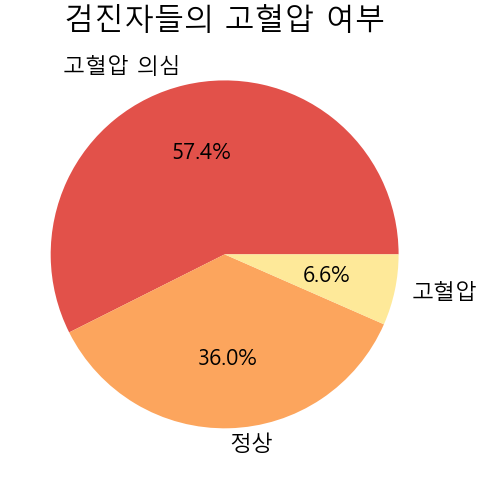

In [42]:
# 검진자들의 고혈압 여부 확인
print("""
현재 검진자들의 고혈압 여부를 살펴보면, 
고혈압을 진단되는 검진자는 65345명으로 전체의 약 6.6%이고, 
고혈압 의심으로 진단되는 검진자는 57.4%이며, 정상 검진자는 36%이다.
""")

plt.figure(figsize=(8,8))
sns.set_palette('Spectral')
x = df2['고혈압진단'].value_counts().values
labels = df2['고혈압진단'].value_counts().index


plt.title('검진자들의 고혈압 여부', size = 30)
plt.pie(x, labels=labels, autopct='%.1f%%', textprops={'fontsize': 22})
plt.show()

## 성별에 따른 고혈압


### 성별에 따른 고혈압 분포 확인

성별에 따른 고혈압 수치를 살펴보면 다음과 같다. 

- 남성: 
    - 수축기 혈압: 최소값 65 평균 126 최대값 260
    - 이완기 혈압: 최소값 31 평균 78 최대값 190

- 여성: 
    - 수축기 혈압: 최소값 64 평균 123 최대값 260
    - 이완기 혈압: 최소값 30 평균 75 최대값 170

In [110]:
성별_고혈압 = df2.groupby(['성별코드'])[['수축기 혈압', '이완기 혈압']].agg(['min', 'mean', 'max', 'count'])
성별_고혈압

수축기 혈압                            이완기 혈압                          
        min        mean    max   count    min       mean    max   count
성별코드                                                                   
남자     65.0  126.507775  260.0  507975   31.0  78.539999  190.0  507975
여자     64.0  123.074780  260.0  484491   30.0  75.008378  170.0  484491


- 남성: 
    - 수축기 혈압: 최소값 65 평균 126 최대값 260
    - 이완기 혈압: 최소값 31 평균 78 최대값 190

- 여성: 
    - 수축기 혈압: 최소값 64 평균 123 최대값 260
    - 이완기 혈압: 최소값 30 평균 75 최대값 170


남성과 여성의 수축기 혈압의 분포는 비슷하다.
하지만 이완기는 남성이 여성보다 평균 수치가 높다.



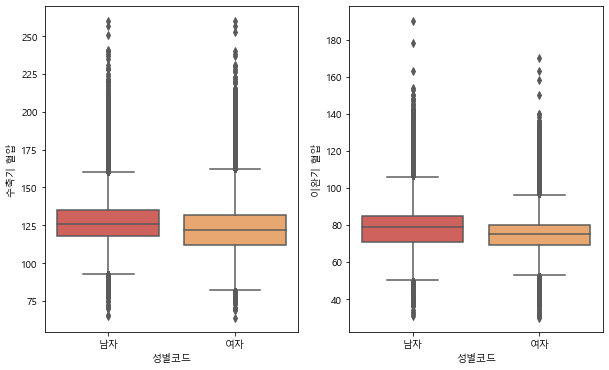

In [111]:
print("""
- 남성: 
    - 수축기 혈압: 최소값 65 평균 126 최대값 260
    - 이완기 혈압: 최소값 31 평균 78 최대값 190

- 여성: 
    - 수축기 혈압: 최소값 64 평균 123 최대값 260
    - 이완기 혈압: 최소값 30 평균 75 최대값 170
""")

print("""
남성과 여성의 수축기 혈압의 분포는 비슷하다.
하지만 이완기는 남성이 여성보다 평균 수치가 높다.
""")


plt.subplot(1,2,1)
plt.xlabel('성별')
sns.boxplot(x='성별코드', y='수축기 혈압',data=df2)

plt.subplot(1,2,2)
plt.xlabel('성별')
sns.boxplot(x='성별코드', y='이완기 혈압',data=df2)

plt.show()

###  성별에 따른 고혈압 비율 확인

- 남성: 고혈압 5.2%, 고혈압 의심 52.2%, 정상 42.6% 
- 여성: 고혈압 7.9%, 고혈압 의심 62.3%, 정상 29.7%


- 남성: 고혈압 5.2%, 고혈압 의심 52.2%, 정상 42.6% 
- 여성: 고혈압 7.9%, 고혈압 의심 62.3%, 정상 29.7%

남성이 여성보다 고혈압 비율이 많다.



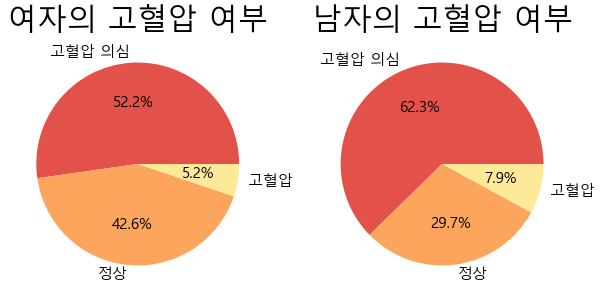

In [112]:
print("""
- 남성: 고혈압 5.2%, 고혈압 의심 52.2%, 정상 42.6% 
- 여성: 고혈압 7.9%, 고혈압 의심 62.3%, 정상 29.7%
""")

print('남성이 여성보다 고혈압 비율이 많다.')
print()

# 성별에 따른 검사자들의 고혈압 여부 확인
고혈압_여자 = df2[df2['성별코드'] == '여자']
고혈압_남자 = df2[df2['성별코드'] == '남자']

plt.subplot(1,2,1)
x1 = 고혈압_여자['고혈압진단'].value_counts().values
labels = 고혈압_여자['고혈압진단'].value_counts().index

plt.title('여자의 고혈압 여부', size = 30)
plt.pie(x1, labels=labels, autopct='%.1f%%', textprops={'fontsize': 15})

plt.subplot(1,2,2)
x2 = 고혈압_남자['고혈압진단'].value_counts().values
labels = 고혈압_남자['고혈압진단'].value_counts().index

plt.title('남자의 고혈압 여부', size = 30)
plt.pie(x2, labels=labels, autopct='%.1f%%', textprops={'fontsize': 15})
plt.show()

## 연령대에 따른 고혈압

### 연령대에 따른 고혈압 분포 확인

- 연령대에 따른 당뇨병을 살펴보면 다음과 같다. 

In [148]:
df2.groupby(['연령대 코드(5세단위)'])[['수축기 혈압', '이완기 혈압']].agg(['min', 'mean', 'max', 'count'])

수축기 혈압                            이완기 혈압                    \
                min        mean    max   count    min       mean    max   
연령대 코드(5세단위)                                                              
40세 ~ 44세      70.0  120.738101  260.0  156270   32.0  76.411563  190.0   
45세 ~ 49세      66.0  121.982284  257.0  144162   31.0  77.077808  170.0   
50세 ~ 54세      65.0  123.040615  260.0  175700   34.0  77.392242  163.0   
55세 ~ 59세      64.0  124.557184  253.0  142086   33.0  77.394634  141.0   
60세 ~ 64세      70.0  126.268772  240.0  155094   30.0  76.980470  178.0   
65세 ~ 69세      74.0  128.422274  237.0   84746   32.0  76.546869  134.0   
70세 ~ 74세      72.0  130.494914  238.0   71275   40.0  75.968979  134.0   
75세 ~ 79세      70.0  132.180713  257.0   35122   31.0  75.393543  148.0   
80세 ~ 84세      80.0  132.786274  227.0   22206   31.0  75.143385  150.0   
85세 이상         80.0  131.517313  223.0    5805   34.0  74.531955  135.0   

                      
               count  
연령대 코드(5세단위)          
40세 ~ 44세     156270  
45세 ~ 49세     144162  
50세 ~ 54세     175700  
55세 ~ 59세     142086  
60세 ~ 64세     155094  
65세 ~ 69세      84746  
70세 ~ 74세      71275  
75세 ~ 79세      35122  
80세 ~ 84세      22206  
85세 이상          5805


고혈압 의심의 수축기 혈압 기준이 120인데 평균 수치가 모든 연령대에서 120을 넘고 있다.
연령대가 높아질수록 수축기와 이완기의 혈압의 변동성이 커지는 것을 알 수있다. 
전체적인 한국인들의 고혈압 관리가 필요하다. 



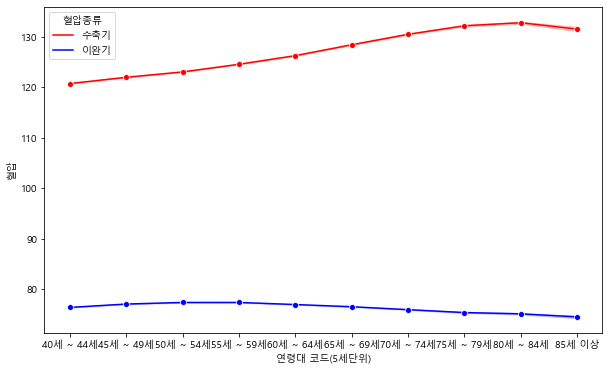

In [165]:
print( """
고혈압 의심의 수축기 혈압 기준이 120인데 평균 수치가 모든 연령대에서 120을 넘고 있다.
연령대가 높아질수록 수축기와 이완기의 혈압의 변동성이 커지는 것을 알 수있다. 
전체적인 한국인들의 고혈압 관리가 필요하다. 
""")

df2_1= df2.loc[:, ['연령대 코드(5세단위)', "수축기 혈압"]]
df2_1["혈압종류"] = "수축기"
df2_1.rename(columns = {"수축기 혈압": "혈압"}, inplace = True)

df2_2= df2.loc[:, ['연령대 코드(5세단위)', "이완기 혈압"]]
df2_2["혈압종류"] = "이완기"
df2_2.rename(columns = {"이완기 혈압": "혈압"}, inplace = True)

df2_3 =  pd.concat([df2_1, df2_2])
df2_3.sort_values("연령대 코드(5세단위)", inplace = True)
df2_3.reset_index(drop=True, inplace = True)

sns.lineplot(data = df2_3, x = '연령대 코드(5세단위)', y = '혈압', hue = '혈압종류', palette = ['red', 'blue'], marker = 'o')
plt.show()

### 연령에 따른 고혈압 의심 그룹 비교



연령에 따른 고혈압 의심 그룹 비교 

전체 인원의 수축기, 이완기 혈압의 패턴과 비슷하다. 

55세~59세 부터 88세까지 수축기와 이완기의 차이가 커지는 형태가 보인다. 

연령이 높을 수록 고혈압 관리가 필요하다.



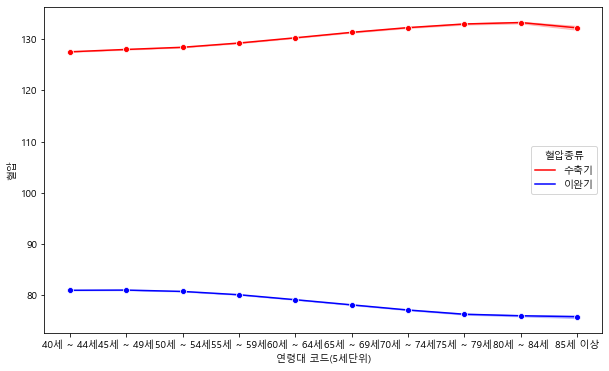

In [168]:
print( """

연령에 따른 고혈압 의심 그룹 비교 

전체 인원의 수축기, 이완기 혈압의 패턴과 비슷하다. 

55세~59세 부터 88세까지 수축기와 이완기의 차이가 커지는 형태가 보인다. 

연령이 높을 수록 고혈압 관리가 필요하다.
""")

고혈압의심환자 = df2[df2['고혈압진단']=='고혈압 의심']

df2_1= 고혈압의심환자.loc[:, ['연령대 코드(5세단위)', "수축기 혈압"]]
df2_1["혈압종류"] = "수축기"
df2_1.rename(columns = {"수축기 혈압": "혈압"}, inplace = True)

df2_2= 고혈압의심환자.loc[:, ['연령대 코드(5세단위)', "이완기 혈압"]]
df2_2["혈압종류"] = "이완기"
df2_2.rename(columns = {"이완기 혈압": "혈압"}, inplace = True)

df2_3 =  pd.concat([df2_1, df2_2])
df2_3.sort_values("연령대 코드(5세단위)", inplace = True)
df2_3.reset_index(drop=True, inplace = True)

sns.lineplot(data = df2_3, x = '연령대 코드(5세단위)', y = '혈압', hue = '혈압종류', palette = ['red', 'blue'], marker = 'o')
plt.show()

### 연령에 따른 고혈압 그룹 비교



고협압 의심 환자랑 비슷한 패턴을 보이고 있다. 

40세 ~ 54세, 75세 ~ 85세 이상인 사람들의 수축기와 이완기 혈압의 변동성이 매우 큰 것을 알 수 있다. 
하지만 변동성에 있어 고혈압 의심 환자보단 변동성이 적다.

54세~75세 사이의 사람들은 수축기와 이완기 혈압의 변동성이 매우 적다. 

의심환자와 마찬가지로 수축기와 이환기의 혈압 수치가 정상보다 높기 때문에 

모든 연령대에서 혈압 관리가 매우 필요하다.




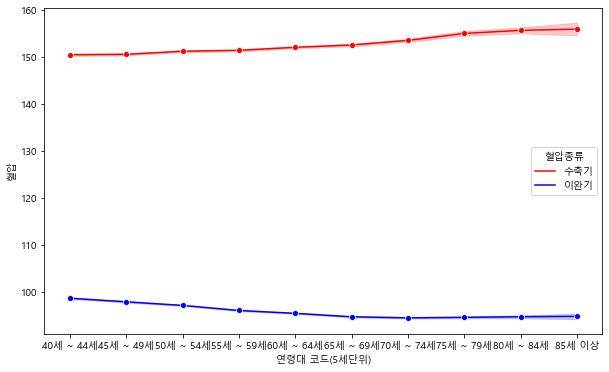

In [166]:
print( """

고협압 의심 환자랑 비슷한 패턴을 보이고 있다.

55세~59세 부터 88세까지 수축기와 이완기의 차이가 커지는 형태가 보인다. 

모든 연령대에서 혈압 관리가 매우 필요하다.

""")

고혈압환자 = df2[df2['고혈압진단']=='고혈압']

df2_1= 고혈압환자.loc[:, ['연령대 코드(5세단위)', "수축기 혈압"]]
df2_1["혈압종류"] = "수축기"
df2_1.rename(columns = {"수축기 혈압": "혈압"}, inplace = True)

df2_2= 고혈압환자.loc[:, ['연령대 코드(5세단위)', "이완기 혈압"]]
df2_2["혈압종류"] = "이완기"
df2_2.rename(columns = {"이완기 혈압": "혈압"}, inplace = True)

df2_3 =  pd.concat([df2_1, df2_2])
df2_3.sort_values("연령대 코드(5세단위)", inplace = True)
df2_3.reset_index(drop=True, inplace = True)

sns.lineplot(data = df2_3, x = '연령대 코드(5세단위)', y = '혈압', hue = '혈압종류', palette = ['red', 'blue'], marker = 'o')
plt.show()

# 간 기능 이상 분석

ALT가 대부분의 간질환에서 간손상 여부를 AST보다 더욱 특이적으로 반영한다. \
\
정상범위\
AST : ~ 40IU/L(unit per liter)\
ALT : ~ 40IU/L(unit per liter)

정상범위 수치 기준 정보\
https://www.amc.seoul.kr/asan/mobile/healthinfo/management/managementDetail.do?managementId=36 \
https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=molaid&logNo=221639056036

## 간 기능 이상 여부 변수 생성
 - AST ALS 수치
  - ~ 40IU/L : 정상
  - 41~200IU/L : 경도
  - 201~400IU/L : 중증도
  - 401IU/L ~ : 중증

In [196]:
# 혈청지오티 수치 범주화

def als_alt(x):
    if x <=40:
        return '정상'
    if 40<x<=200:
        return '경도'
    if 200<x<=400:
        return '중증도'
    if x>400:
        return '중증'
    
df['간장질환_AST'] = df['(혈청지오티)AST'].apply(als_alt)
df['간장질환_ALT'] = df['(혈청지오티)ALT'].apply(als_alt)

## 성별에 따른 간 기능 이상 

### 성별에 따른 간 기능 이상 분포 확인

 - 남성의 AST 최소값 1, 평균 29.34, 최대값 8712
 - 여성의 AST 최소값 1, 평균 25.98, 최대값 8270
 
 
 - 남성의 ALT 최소값 1, 평균 31.00, 최대값 3461
 - 여성의 ALT 최소값 1, 평균 22.31, 최대값 5990

In [197]:
# 혈청지오티 정보
df[['성별코드','(혈청지오티)AST','(혈청지오티)ALT']].groupby('성별코드').describe().T

성별코드                         남자             여자
(혈청지오티)AST count  507950.000000  484449.000000
           mean       29.336907      25.980277
           std        25.639225      24.795642
           min         1.000000       1.000000
           25%        21.000000      19.000000
           50%        25.000000      23.000000
           75%        32.000000      28.000000
           max      8712.000000    8270.000000
(혈청지오티)ALT count  507949.000000  484449.000000
           mean       31.001443      22.312075
           std        26.144305      24.737710
           min         1.000000       1.000000
           25%        18.000000      14.000000
           50%        25.000000      18.000000
           75%        36.000000      25.000000
           max      3461.000000    5990.000000

### 성별에 따른 간 기능 이상 비율 확인

AST와 ALT에서 '경도','중증도','중증' 결과 모두 여성보다 남성이 높게 나타남

남성의 평균 AST/ALT 수치가 여성보다 높음

In [198]:
# 성별 AST / ALT 그룹화
df_AST = df.groupby(['성별코드','간장질환_AST'])[['가입자 일련번호']].count()
df_AST.reset_index(inplace=True)
df_AST.columns = ['성별','간장질환_AST','count']
df_ALT = df.groupby(['성별코드','간장질환_ALT'])[['가입자 일련번호']].count()
df_ALT.reset_index(inplace=True)
df_ALT.columns = ['성별','간장질환_ALT','count']

- AST와 ALT에서 '경도','중증도','중증' 결과 모두 여성보다 남성이 높게 나타남
- 남성의 평균 AST/ALT 수치가 여성보다 높음)


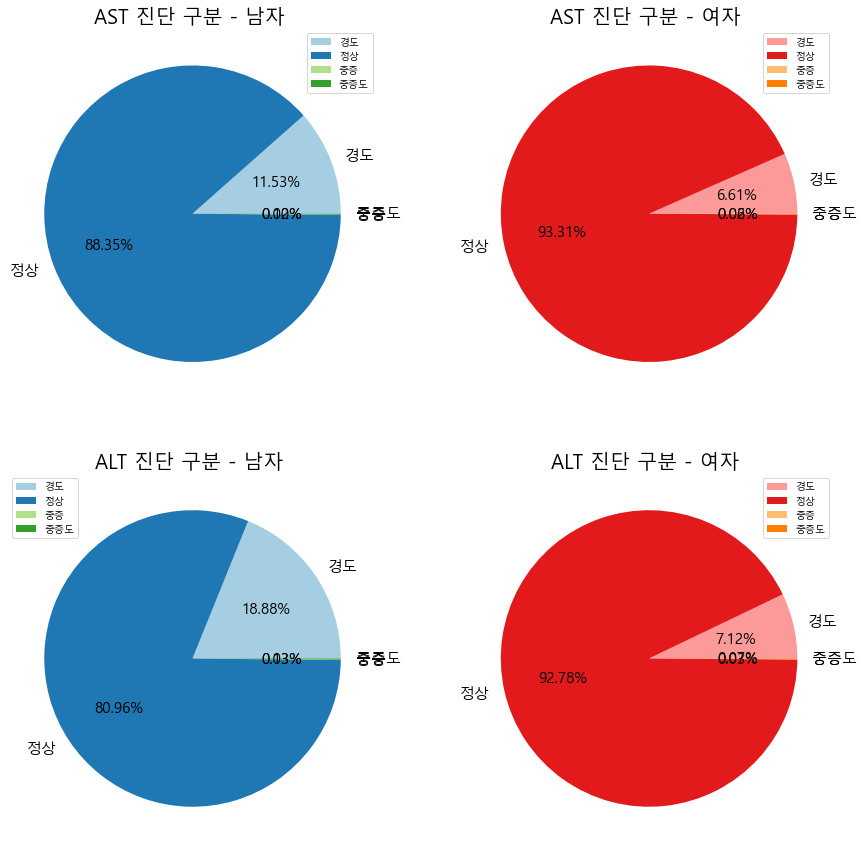

In [199]:
print("- AST와 ALT에서 '경도','중증도','중증' 결과 모두 여성보다 남성이 높게 나타남")
print("- 남성의 평균 AST/ALT 수치가 여성보다 높음)")

import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font',family = "Malgun Gothic")
colors = sns.color_palette('Paired', 8) # 색상

labels=['경도','정상','중증','중증도']

plt.figure(figsize=(15,15)) # 차트 크기

plt.subplot(221) # 차트 위치 (2,2) 행렬 중 (1,1)
plt.pie(df_AST[df_AST['성별']=='남자']['count'], # 데이터 값
       labels=df_AST[df_AST['성별']=='남자']['간장질환_AST'], # 데이터 레이블
       autopct=lambda p : '{:.2f}%'.format(p), # 데이터 소숫점 자리수
        colors = [colors[0],colors[1],colors[2],colors[3]],
        textprops={'fontsize': 15}) # 레이블 폰트 사이즈
plt.legend(labels) # 범례 표시
plt.title('AST 진단 구분 - 남자 ',size=20) # 차트 제목

plt.subplot(222) # 차트 위치 (2,2) 행렬 중 (1,2)
plt.pie(df_AST[df_AST['성별']=='여자']['count'],
       labels=df_AST[df_AST['성별']=='여자']['간장질환_AST'],
       autopct=lambda p : '{:.2f}%'.format(p),
        colors = [colors[4],colors[5],colors[6],colors[7]],
        textprops={'fontsize': 15})
plt.legend(labels)
plt.title('AST 진단 구분 - 여자 ', size=20)

plt.subplot(223) # 차트 위치 (2,2) 행렬 중 (2,1)
plt.pie(df_ALT[df_ALT['성별']=='남자']['count'],
       labels=df_ALT[df_ALT['성별']=='남자']['간장질환_ALT'],
       autopct=lambda p : '{:.2f}%'.format(p),
        colors = [colors[0],colors[1],colors[2],colors[3]],
        textprops={'fontsize': 15})
plt.legend(labels)
plt.title('ALT 진단 구분 - 남자 ',size=20)

plt.subplot(224) # 차트 위치 (2,2) 행렬 중 (2,2)
plt.pie(df_ALT[df_ALT['성별']=='여자']['count'],
       labels=df_ALT[df_ALT['성별']=='여자']['간장질환_ALT'],
       autopct=lambda p : '{:.2f}%'.format(p),
        colors = [colors[4],colors[5],colors[6],colors[7]],
        textprops={'fontsize': 15})
plt.legend(labels)
plt.title('ALT 진단 구분 - 여자 ',size=20)
plt.show()

## 연령대에 따른 간 기능 이상 

### 연령대에 따른 간 기능 이상 수치 확인

연령별 AST와 ALT 수치는 비슷한 추세를 보인다.

AST는 65세부터, ALT는 60세부터 수치가 하락한다.

In [200]:
# 연령별 그룹화
연령별_AST_ALT = df.groupby(['연령대 코드(5세단위)','성별코드'])[['(혈청지오티)AST','(혈청지오티)ALT']].mean().reset_index()
연령별_AST_ALT = 연령별_AST_ALT.pivot_table(index='연령대 코드(5세단위)',
                       columns ='성별코드',
                       values=['(혈청지오티)AST','(혈청지오티)ALT'])

In [1]:
print('')
print('연령별 AST와 ALT 수치는 비슷한 추세를 보인다.')
print('AST는 65세부터, ALT는 60세부터 수치가 하락한다.')


data_AST_ALT1 = go.Line(x=연령별_AST_ALT.index,
                        y=(연령별_AST_ALT['(혈청지오티)AST']['남자'] + 연령별_AST_ALT['(혈청지오티)AST']['여자'])/2 ,
                        name="AST 평균")
data_AST_ALT2 = go.Line(x=연령별_AST_ALT.index,
                        y=(연령별_AST_ALT['(혈청지오티)ALT']['남자']+연령별_AST_ALT['(혈청지오티)ALT']['여자'])/2,
                        name="ALT 평균")
layout = go.Layout(title='연령별 - AST/ALS 평균',width=900, height=400)
fig = go.Figure(data=[data_AST_ALT1,data_AST_ALT2], layout=layout) 
fig.show()


연령별 AST와 ALT 수치는 비슷한 추세를 보인다.
AST는 65세부터, ALT는 60세부터 수치가 하락한다.


NameError: name 'go' is not defined

### 연령대에 따른 간 기능 이상 비율 확인

전체 검사자 중 AST '경도' 분류 비율은 64세까지 상승하다가 65세 이상부터 하락한다.

전체 검사자 중 ALT '경도' 분류 비율은 40세부터 꾸준히 하락한다

In [202]:
# 연령별 AST / ALT 그룹화
연령별_AST = df.groupby(['연령대 코드(5세단위)','간장질환_AST'])[['가입자 일련번호']].count().reset_index()
연령별_AST.columns=['연령대 코드(5세단위)','간장질환_AST','COUNT']
연령별_ALT = df.groupby(['연령대 코드(5세단위)','간장질환_ALT'])[['가입자 일련번호']].count().reset_index()
연령별_ALT.columns=['연령대 코드(5세단위)','간장질환_ALT','COUNT']

연령별_AST_SUM = 연령별_AST.groupby('연령대 코드(5세단위)').sum()
연령별_AST_SUM = 연령별_AST_SUM.append([연령별_AST_SUM,연령별_AST_SUM,연령별_AST_SUM]).sort_index()
연령별_AST_SUM.columns=['SUM']
연령별_AST_SUM.reset_index(inplace=True)

연령별_ALT_SUM = 연령별_ALT.groupby('연령대 코드(5세단위)').sum()
연령별_ALT_SUM = 연령별_ALT_SUM.append([연령별_ALT_SUM,연령별_ALT_SUM,연령별_ALT_SUM]).sort_index()
연령별_ALT_SUM.columns=['SUM']
연령별_ALT_SUM.reset_index(inplace=True)

연령별_AST_df = pd.concat([연령별_AST,연령별_AST_SUM], axis=1).iloc[:,[0,1,2,4]]
연령별_ALT_df = pd.concat([연령별_ALT,연령별_ALT_SUM], axis=1).iloc[:,[0,1,2,4]]

연령별_AST_df['rate'] = (연령별_AST_df['COUNT']/연령별_AST_df['SUM'])*100
연령별_ALT_df['rate'] = (연령별_ALT_df['COUNT']/연령별_ALT_df['SUM'])*100

In [203]:
print("전체 검사자 중 AST '경도' 분류 비율은 64세까지 상승하다가 65세 이상부터 하락한다.")
print("전체 검사자 중 ALT '경도' 분류 비율은 40세부터 꾸준히 하락한다.")


# 연령별 AST / ALT 그룹 시각화
data1 = go.Bar(x=연령별_AST_df[연령별_AST_df['간장질환_AST']=='정상']['연령대 코드(5세단위)'],
              y=연령별_AST_df[연령별_AST_df['간장질환_AST']=='정상']['rate'],
             name = 'AST_정상')

data2 = go.Bar(x=연령별_AST_df[연령별_AST_df['간장질환_AST']=='경도']['연령대 코드(5세단위)'],
              y=연령별_AST_df[연령별_AST_df['간장질환_AST']=='경도']['rate'],
             name = 'AST_경도')

data3 = go.Bar(x=연령별_AST_df[연령별_AST_df['간장질환_AST']=='중증도']['연령대 코드(5세단위)'],
              y=연령별_AST_df[연령별_AST_df['간장질환_AST']=='중증도']['rate'],
             name = 'AST_중증도') 

data4 = go.Bar(x=연령별_AST_df[연령별_AST_df['간장질환_AST']=='중증']['연령대 코드(5세단위)'],
              y=연령별_AST_df[연령별_AST_df['간장질환_AST']=='중증']['rate'],
             name = 'AST_중증')

data5 = go.Bar(x=연령별_ALT_df[연령별_ALT_df['간장질환_ALT']=='정상']['연령대 코드(5세단위)'],
              y=연령별_ALT_df[연령별_ALT_df['간장질환_ALT']=='정상']['rate'],
             name = 'ALT_정상')

data6 = go.Bar(x=연령별_ALT_df[연령별_ALT_df['간장질환_ALT']=='경도']['연령대 코드(5세단위)'],
              y=연령별_ALT_df[연령별_ALT_df['간장질환_ALT']=='경도']['rate'],
             name = 'ALT_경도')

data7 = go.Bar(x=연령별_ALT_df[연령별_ALT_df['간장질환_ALT']=='중증도']['연령대 코드(5세단위)'],
              y=연령별_ALT_df[연령별_ALT_df['간장질환_ALT']=='중증도']['rate'],
             name = 'ALT_중증도') 

data8 = go.Bar(x=연령별_ALT_df[연령별_ALT_df['간장질환_ALT']=='중증']['연령대 코드(5세단위)'],
              y=연령별_ALT_df[연령별_ALT_df['간장질환_ALT']=='중증']['rate'],
             name = 'ALT_중증') 

fig = make_subplots(
    rows=1, cols=2, shared_xaxes=True, vertical_spacing=0.05
)

fig.add_trace(data1,row=1, col=1)
fig.add_trace(data2,row=1, col=1)
fig.add_trace(data3,row=1, col=1)
fig.add_trace(data4,row=1, col=1)
fig.add_trace(data5,row=1, col=2)
fig.add_trace(data6,row=1, col=2)
fig.add_trace(data7,row=1, col=2)
fig.add_trace(data8,row=1, col=2)
# fig.update_yaxes(range=[0,100])
fig.update_layout(height=400, width=800, barmode='stack',
                  title_text="연령별 - AST/ALT 진단 결과(비율)")

전체 검사자 중 AST '경도' 분류 비율은 64세까지 상승하다가 65세 이상부터 하락한다.
전체 검사자 중 ALT '경도' 분류 비율은 40세부터 꾸준히 하락한다.


## 성별, 연령대에 따른 간 기능 이상

남성의 경우 나이가 많아질수록 전체 평균에 가깝게 하락 하는 반면, 여성은 나이가 많아질수록 전체 평균에 가깝게 상승한다.

In [204]:
print('남성의 경우 나이가 많아질수록 전체 평균에 가깝게 하락 하는 반면, 여성은 나이가 많아질수록 전체 평균에 가깝게 상승한다.')

data1 = go.Bar(x=연령별_AST_ALT.index,
                        y=연령별_AST_ALT['(혈청지오티)AST']['남자'],
                        name="AST_남자")
data2 = go.Bar(x=연령별_AST_ALT.index,
                        y=연령별_AST_ALT['(혈청지오티)AST']['여자'],
                        name="AST_여자")
data3 = go.Bar(x=연령별_AST_ALT.index,
                        y=연령별_AST_ALT['(혈청지오티)ALT']['남자'],
                        name="ALT_남자")
data4 = go.Bar(x=연령별_AST_ALT.index,
                        y=연령별_AST_ALT['(혈청지오티)ALT']['여자'],
                        name="ALT_여자")

fig = make_subplots(
    rows=1, cols=2, shared_xaxes=True, vertical_spacing=0.05
)

fig.add_trace(data_AST_ALT2,row=1, col=2)
fig.add_trace(data3,row=1, col=2)
fig.add_trace(data4,row=1, col=2)
fig.add_trace(data_AST_ALT1,row=1, col=1)
fig.add_trace(data1,row=1, col=1)
fig.add_trace(data2,row=1, col=1)
fig.update_yaxes(range=[0,40])
fig.update_layout(height=400, width=900,
                  title_text="연령별/성별 - AST ALT 평균")

남성의 경우 나이가 많아질수록 전체 평균에 가깝게 하락 하는 반면, 여성은 나이가 많아질수록 전체 평균에 가깝게 상승한다.


## 음주 여부에 따른 간 기능 이상 

모든 연령대에서 음주를 하는 사람이 하지 않는 사람보다 AST/ALT 평균 수치가 높게 나타난다.

In [205]:
# 음주 여부
음주여부_AST_ALT = df.groupby(['연령대 코드(5세단위)','음주여부'])[['(혈청지오티)AST','(혈청지오티)ALT']].mean().reset_index()

In [211]:
음주여부_AST_ALT

,연령대 코드(5세단위),음주여부,(혈청지오티)AST,(혈청지오티)ALT
0,40세 ~ 44세,마시지 않음,24.287830,25.253870
1,40세 ~ 44세,마심,26.800383,29.409989
2,45세 ~ 49세,마시지 않음,24.258223,24.496903
3,45세 ~ 49세,마심,26.912943,28.195370
4,50세 ~ 54세,마시지 않음,26.160975,25.719904
5,50세 ~ 54세,마심,28.188285,28.287495
6,55세 ~ 59세,마시지 않음,27.342762,26.355317
7,55세 ~ 59세,마심,29.110914,28.134429
8,60세 ~ 64세,마시지 않음,28.056564,25.917081
9,60세 ~ 64세,마심,30.161241,27.966333


In [213]:
print('모든 연령대에서 음주를 하는 사람이 하지 않는 사람보다 AST/ALT 평균 수치가 높게 나타난다.')

data1 = go.Line(x=음주여부_AST_ALT[음주여부_AST_ALT['음주여부']=='마심']['연령대 코드(5세단위)'],
              y=음주여부_AST_ALT[음주여부_AST_ALT['음주여부']=='마심']['(혈청지오티)AST'],
             name = 'Y_AST')

data2 = go.Line(x=음주여부_AST_ALT[음주여부_AST_ALT['음주여부']=='마시지 않음']['연령대 코드(5세단위)'],
              y=음주여부_AST_ALT[음주여부_AST_ALT['음주여부']=='마시지 않음']['(혈청지오티)AST'],
             name = 'N_AST')

data3 = go.Line(x=음주여부_AST_ALT[음주여부_AST_ALT['음주여부']=='마심']['연령대 코드(5세단위)'],
              y=음주여부_AST_ALT[음주여부_AST_ALT['음주여부']=='마심']['(혈청지오티)ALT'],
             name = 'Y_ALT')

data4 = go.Line(x=음주여부_AST_ALT[음주여부_AST_ALT['음주여부']=='마시지 않음']['연령대 코드(5세단위)'],
              y=음주여부_AST_ALT[음주여부_AST_ALT['음주여부']=='마시지 않음']['(혈청지오티)ALT'],
             name = 'N_ALT')


fig = make_subplots(
    rows=1, cols=2, shared_xaxes=True, vertical_spacing=0.02
)

fig.add_trace(data1,row=1, col=1)
fig.add_trace(data2,row=1, col=1)
fig.add_trace(data3,row=1, col=2)
fig.add_trace(data4,row=1, col=2)

fig.update_yaxes(range=[16,32]) # y축 스케일
fig.update_layout(height=400, width=800,
                  title_text="음주여부별/연령별 - AST/ALT 평균")

모든 연령대에서 음주를 하는 사람이 하지 않는 사람보다 AST/ALT 평균 수치가 높게 나타난다.


# 당뇨병 분석

## 당뇨병 데이터 확인

- 변수 확인
    - 공복 혈당 수치 확인: 최솟값 1, 평균값 104, 최댓값 950.
    - 결측값 개수: 7602, (삭제한 데이터 992398 사용).
 

In [107]:
# 식전혈당(공복혈당) 값 확인 
print(df["식전혈당(공복혈당)"].describe())
print()

# 결측값 확인 및 삭제 
print("결측값:", df["식전혈당(공복혈당)"].isna().sum())
print()

df4 = df[ df["식전혈당(공복혈당)"].notna()]
print("결측값 제거:", df.shape[0])

count    992398.000000
mean        104.257728
std          25.412529
min           1.000000
25%          91.000000
50%          99.000000
75%         109.000000
max         950.000000
Name: 식전혈당(공복혈당), dtype: float64

결측값: 7602

결측값 제거: 1000000



## 당뇨병 여부 변수 생성

건강검진에서 당뇨병의 기준은 다음과 같다.

- 변수: 공복상태 혈당 검사 (fasting glucose)
    - 저혈당: 70 mg/dl 이하.
    - 정상치:  70~99 mg/dl.
    - 공복혈당장애: 100-125 mg/dl. 이는 당뇨병 전단계 또는 당뇨병이 생길 위험도가 높은 상태인데 그 위험도는 공복혈당장애가 있는 사람이 1년이 지나면 약 10%에서 당뇨병이 생깁니다.
    - 당뇨병: 126 mg/dL 이상인 경우 당뇨병으로 진단. 당뇨병의 증상이 없다면 한번 더 측정한 후 두 번의 결과를 보고 판정을 내리는 것이 정확합니다. 
    
    
    
**<당뇨병 여부에 따른 검진자들의 분포>**

현재 검진자들의 당뇨병 여부를 살펴보면, 당뇨병인 검진자는 517086명으로 전체의 52%이고, 
공복혈당장애인 검진자는 366293명으로 전체의 36.9%이다. 공복혈당장애인 사람들은 1년에 10% 확률로 당뇨병에 걸리기 때문에 주의해야한다. 

    - 정상: 52 %
    - 공복혈당장애: 36%
    - 당뇨병: 11%
    - 저혈당: 40%
    

In [108]:
#### 당뇨병
def diabetes(x):
    if (x >=70) & (x<=99): return "정상"
    elif (x<70): return "저혈당"
    elif (x >= 100) & (x<=125): return "공복혈당장애"
    else: return "당뇨병"

df4["당뇨병여부"] = df4["식전혈당(공복혈당)"].apply(diabetes)
print("검진자들의 당뇨병 빈도")
print(df4["당뇨병여부"].value_counts())
print()

print("검진자들의 당뇨병 퍼센트")
print(df4["당뇨병여부"].value_counts()/992398 *100 )

검진자들의 당뇨병 빈도
정상        517086
공복혈당장애    366293
당뇨병       105231
저혈당         3788
Name: 당뇨병여부, dtype: int64

검진자들의 당뇨병 퍼센트
정상        52.104700
공복혈당장애    36.909889
당뇨병       10.603709
저혈당        0.381702
Name: 당뇨병여부, dtype: float64


C:\Users\Admin\AppData\Local\Temp\ipykernel_2612\2627244335.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4["당뇨병여부"] = df4["식전혈당(공복혈당)"].apply(diabetes)


현재 검진자들의 당뇨병 여부를 살펴보면, 
당뇨병인 검진자는 517086명으로 전체의 52%이고, 
공복혈당장애인 검진자는 366293명으로 전체의 36.9%이다. 
공복혈당장애인 사람들은 1년에 10% 확률로 당뇨병에 걸리기 때문에 주의해야한다. 


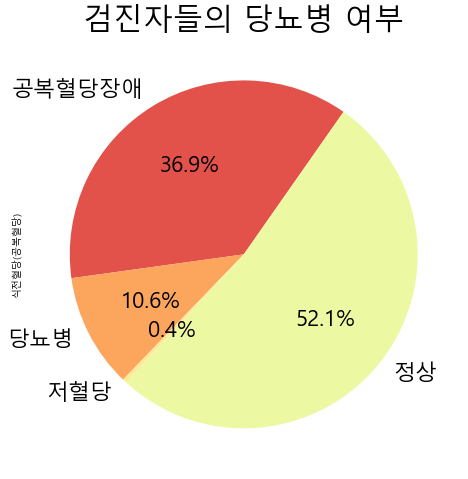

In [109]:
# 검잔자들의 당뇨병 여부 확인 
print("""현재 검진자들의 당뇨병 여부를 살펴보면, 
당뇨병인 검진자는 517086명으로 전체의 52%이고, 
공복혈당장애인 검진자는 366293명으로 전체의 36.9%이다. 
공복혈당장애인 사람들은 1년에 10% 확률로 당뇨병에 걸리기 때문에 주의해야한다. """)

plt.figure(figsize=(8,8))
sns.set_palette('Spectral')
df4.pivot_table(
    index = "당뇨병여부", 
    values="식전혈당(공복혈당)" , 
    aggfunc="count"
)["식전혈당(공복혈당)"].plot.pie(autopct='%.1f%%', textprops={'fontsize': 22}, startangle=55)

plt.title("검진자들의 당뇨병 여부", size = 30)
plt.show()

## 성별에 따른 당뇨병

### 성별에 따른 당뇨병 분포 확인

- 성별에 따른 당뇨병을 살펴보면 다음과 같다. 

    - 남성의 당뇨병은 최소값 1, 평균 107.47, 최대값 950
    - 여성의 당뇨병은 최소값 24, 평균 100.88, 최대값 901


In [113]:
df4.groupby(["성별코드"])[["식전혈당(공복혈당)"]].agg(["min", "mean", "max", "count"])

식전혈당(공복혈당)                           
            min        mean    max   count
성별코드                                      
남자          1.0  107.474399  950.0  507950
여자         24.0  100.885007  901.0  484448

    
- 남성의 공복혈당은 최소값 1, 평균 107.47, 최대값 950
- 여성의 공복혈당은 최소값 24, 평균 100.88, 최대값 901

남성의 공복혈당이 여성의 평균 수치보다 높다.


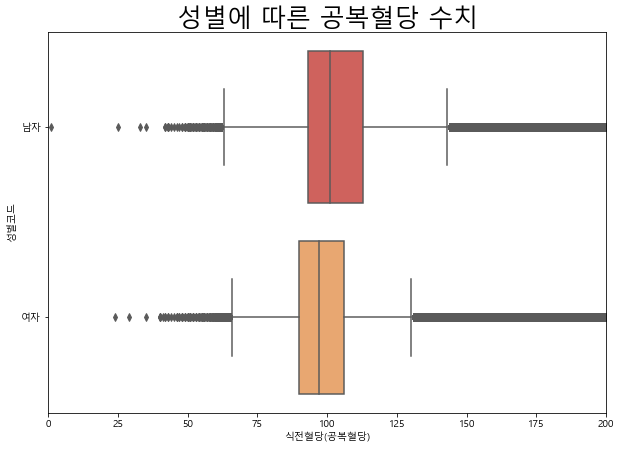

In [114]:
print("""    
- 남성의 공복혈당은 최소값 1, 평균 107.47, 최대값 950
- 여성의 공복혈당은 최소값 24, 평균 100.88, 최대값 901
""")
print("남성의 공복혈당이 여성의 평균 수치보다 높다.")

plt.figure(figsize=(10, 7))
sns.boxplot( y ="성별코드", x="식전혈당(공복혈당)" , data=df4)
plt.xlim(0, 200)
plt.title("성별에 따른 공복혈당 수치", size = 25)
plt.show()

### 성별에 따른 당뇨병 비율 확인

- 남성은 당뇨병이 45.1%, 공복혈당장애가 41.1%로 비슷하다.
- 여성은 당뇨병이 59.4%, 공복혈당장애가 32.5%로 당뇨병인 사람이 더 많다.

남성은 당뇨병이 45.1%, 공복혈당장애가 41.1%로 비슷하다.
여성은 당뇨병이 59.4%, 공복혈당장애가 32.5%로 당뇨병인 사람이 더 많다.


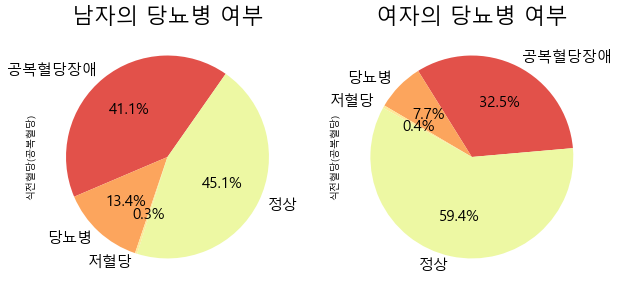

In [115]:
# 성별에 따른 검자들의 당뇨병 여부 확인 
print("남성은 당뇨병이 45.1%, 공복혈당장애가 41.1%로 비슷하다.")
print("여성은 당뇨병이 59.4%, 공복혈당장애가 32.5%로 당뇨병인 사람이 더 많다.")

sns.set_palette('Spectral')
df4_1 = df4[df4["성별코드"]=="남자"]
df4_2 = df4[df4["성별코드"]=="여자"]


plt.subplot(1,2,1)
df4_1.pivot_table(
    index = "당뇨병여부", 
    values="식전혈당(공복혈당)" , 
    aggfunc="count"
)["식전혈당(공복혈당)"].plot.pie(autopct='%.1f%%', textprops={'fontsize': 15},  startangle=55)
plt.title("남자의 당뇨병 여부", size = 22)

plt.subplot(1,2,2)
df4_2.pivot_table(
    index = "당뇨병여부", 
    values="식전혈당(공복혈당)" , 
    aggfunc="count"
)["식전혈당(공복혈당)"].plot.pie( autopct='%.1f%%', textprops={'fontsize': 15},  startangle=5)
plt.title("여자의 당뇨병 여부", size = 22)
                        
plt.show()

**<성별에 따른 공복혈당장애 그룹>**

- 남성 평균 108.86  이고 여성 평균 108.04 이다.
- 공복혈당장애 그룹의 남성과 여성의 평균 공복혈당 차이는 거의 없다. 


In [116]:
df4_3 = df4[df4["당뇨병여부"]=="공복혈당장애"]
df4_3.groupby(["성별코드"])[["식전혈당(공복혈당)"]].agg(["min", "mean", "max", "count"])

식전혈당(공복혈당)                           
            min        mean    max   count
성별코드                                      
남자        100.0  108.866036  125.0  208915
여자        100.0  108.048939  125.0  157378

### 성별에 따른 공복혈당장애 그룹 비교

성별에 따른 공복혈당장애 그룹의 공복혈당 비교하면 다음과 같다
남성 평균 108.86  이고 여성 평균 108.04 이다.
공복혈당장애 그룹의 남성과 여성의 평균 공복혈당 차이는 거의 없다. 



성별에 따른 공복혈당장애 그룹의 공복혈당 비교하면 다음과 같다
남성 평균 108.86  이고 여성 평균 108.04 이다.
공복혈당장애 그룹의 남성과 여성의 평균 공복혈당 차이는 거의 없다. 





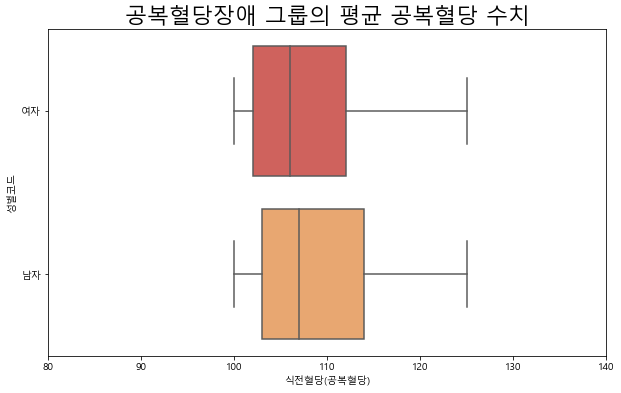

In [117]:
# 남자와 여자의 공복혈당장애 
print("""

성별에 따른 공복혈당장애 그룹의 공복혈당 비교하면 다음과 같다
남성 평균 108.86  이고 여성 평균 108.04 이다.
공복혈당장애 그룹의 남성과 여성의 평균 공복혈당 차이는 거의 없다. 

""")
print()


df4_3 = df4[df4["당뇨병여부"]=="공복혈당장애"]
sns.boxplot( y = "성별코드", x="식전혈당(공복혈당)" , data=df4_3)
plt.xlim(80, 140)
plt.title("공복혈당장애 그룹의 평균 공복혈당 수치", size = 22)
plt.show()

### 성별에 따른 당뇨병 그룹 비교

성별에 따른 당뇨병 그룹의 공복혈당 비교하면 다음과 같다
남성 평균 159.666  이고 여성 평균 155.97 이다.
당뇨병 그룹의 남성이 평균 공복혈당이 여성보다 높다.

In [118]:
df4_4 = df4[df4["당뇨병여부"]=="당뇨병"]
df4_4.groupby(["성별코드"])[["식전혈당(공복혈당)"]].agg(["min", "mean", "max", "count"])

식전혈당(공복혈당)                          
            min        mean    max  count
성별코드                                     
남자        126.0  159.662478  950.0  68126
여자        126.0  155.971891  901.0  37105



성별에 따른 당뇨병 그룹의 공복혈당 비교하면 다음과 같다
남성 평균 159.666  이고 여성 평균 155.97 이다.
당뇨병 그룹의 남성이 평균 공복혈당이 여성보다 높다.





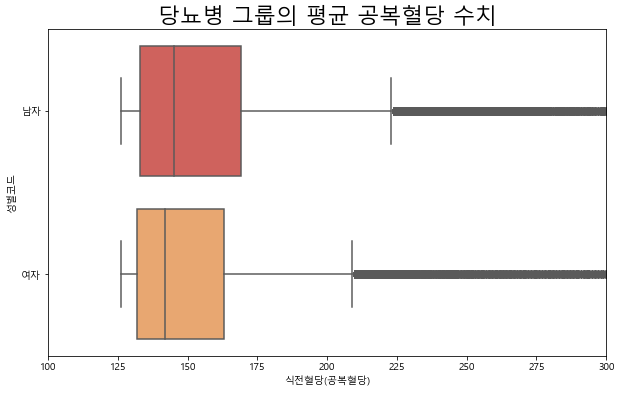

In [119]:
# 남자와 여자의 당뇨병
print("""

성별에 따른 당뇨병 그룹의 공복혈당 비교하면 다음과 같다
남성 평균 159.666  이고 여성 평균 155.97 이다.
당뇨병 그룹의 남성이 평균 공복혈당이 여성보다 높다.

""")
print()
sns.boxplot( y = "성별코드", x ="식전혈당(공복혈당)" , data=df4_4)
plt.xlim(100, 300)
plt.title("당뇨병 그룹의 평균 공복혈당 수치", size = 22)
plt.show()

## 연령대에 따른 당뇨병

###  연령대에 따른 당뇨병 분포 확인

In [292]:
df.groupby(["연령대 코드(5세단위)"])[["식전혈당(공복혈당)"]].agg(["min", "mean", "max", "count"])

식전혈당(공복혈당)                           
                    min        mean    max   count
연령대 코드(5세단위)                                      
40세 ~ 44세          35.0   99.206638  680.0  156273
45세 ~ 49세          43.0  101.349410  950.0  144160
50세 ~ 54세           1.0  103.408878  890.0  175698
55세 ~ 59세          35.0  105.525506  763.0  142086
60세 ~ 64세          40.0  106.663460  754.0  155090
65세 ~ 69세          25.0  107.536513  612.0   84723
70세 ~ 74세          40.0  108.176618  701.0   71250
75세 ~ 79세          43.0  108.339912  551.0   35115
80세 ~ 84세          42.0  108.150160  901.0   22203
85세 이상             49.0  107.315690  638.0    5800

나이가 많아짐에 따라 공복혈당 수치가 증가 추세이다.
단 40세부터 79세까지 쭉 증가하다가 80세 이후 줄어드는 것을 알 수 있다.


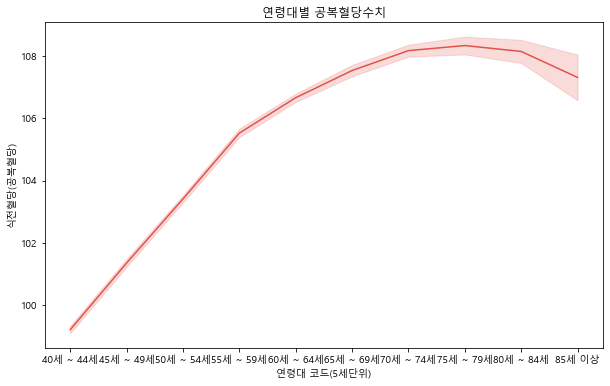

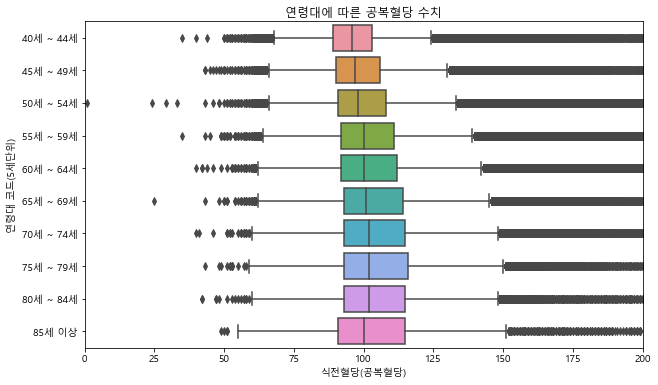

In [305]:
df.sort_values("연령대 코드(5세단위)", inplace=True)
print("나이가 많아짐에 따라 공복혈당 수치가 증가 추세이다.")
print("단 40세부터 79세까지 쭉 증가하다가 80세 이후 줄어드는 것을 알 수 있다.")

sns.set_palette('Spectral')
sns.lineplot(x="연령대 코드(5세단위)", y="식전혈당(공복혈당)", data = df)
plt.title("연령대별 공복혈당수치")
plt.show()

sns.boxplot( y ="연령대 코드(5세단위)", x="식전혈당(공복혈당)" , data=df)
plt.xlim(0, 200)
plt.title("연령대에 따른 공복혈당 수치")
plt.show()

### 연령대에 따른 공복혈당장애 그룹 비교

공복혈당장애 그룹의 혈당은 나이가 높아짐에 따라 증가하는 추세를 가진다.
75~79세에서 잠깐 감소하지만 계속 증가한다.


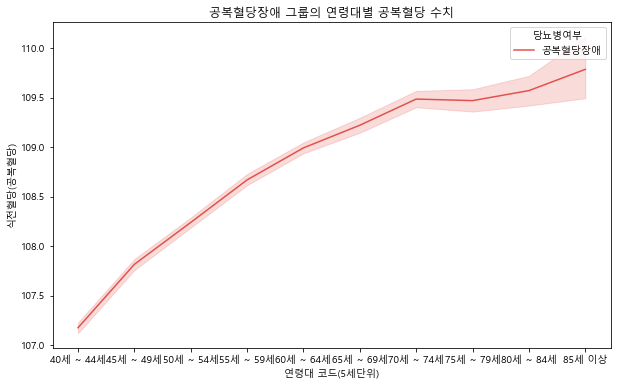

In [316]:
# 연령대에 따른 공복혈당장애 

print("공복혈당장애 그룹의 혈당은 나이가 높아짐에 따라 증가하는 추세를 가진다.")
print("75~79세에서 잠깐 감소하지만 계속 증가한다.")

df3 = df[df["당뇨병여부"]=="공복혈당장애"]
sns.lineplot(x="연령대 코드(5세단위)", y="식전혈당(공복혈당)", hue="당뇨병여부", data = df3)
plt.title("공복혈당장애 그룹의 연령대별 공복혈당 수치")
plt.show()


### 연령대에 따른 당뇨병 그룹 비교

당뇨병 그룹의 40세부터 75~79세까지 공복혈당이 감소하고, 80세부터 다시 증가한다.
공복혈당장애 그룹의 경우는 연령대에 따라 증가하는 모습을 보였지만, 
당뇨병 그룹은 감소했다가 증가하는 형상을 보인다.
이를 통해 알 수 있는 것은 당뇨병이 아닌 공복혈당장애 그룹은 혈당 관리를 하지 않지만,
      당뇨병 그룹은 혈당 관리를 하는 것으로 보인다.


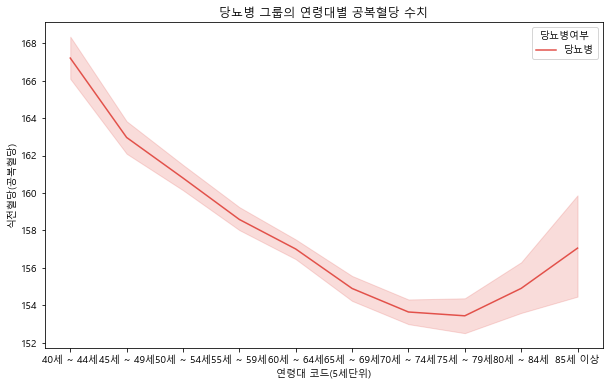

In [318]:
# 연령대에 따른 당뇨병 그룹

print("당뇨병 그룹의 40세부터 75~79세까지 공복혈당이 감소하고, 80세부터 다시 증가한다.")
print("공복혈당장애 그룹의 경우는 연령대에 따라 증가하는 모습을 보였지만, ")
print("당뇨병 그룹은 감소했다가 증가하는 형상을 보인다.")
print("""이를 통해 알 수 있는 것은 당뇨병이 아닌 공복혈당장애 그룹은 혈당 관리를 하지 않지만,
      당뇨병 그룹은 혈당 관리를 하는 것으로 보인다.""")


df4 = df[df["당뇨병여부"]=="당뇨병"]
sns.lineplot(x="연령대 코드(5세단위)", y="식전혈당(공복혈당)", hue="당뇨병여부", data = df4)
plt.title("당뇨병 그룹의 연령대별 공복혈당 수치")
plt.show()


# 이상지질혈증 분석



## 이상지질혈증 여부 변수 생성

이상지질혈증이란 ? :: <br>지단백 대사 이상으로 혈중 내의 지질 양이 비정상적으로 변화되어 고콜레스테롤혈증, 고중성지방혈증, 저고밀도 지 단밸 혈증 등의 형태 <br>
<ul>
<il>LDL( 저밀도지단백 콜레스테롤 ) : 혈관벽에 쌓여 심혈관 및 뇌혈관 질환을 일으키는 동맥경화 유발 </il><br>
<il>HDL (고밀도지단백 콜레스테롤) 혈관벽에 쌓인 콜레스테롤을 간으로 운반하는 역할. 동맥경화 예빵</il><br>
<il>중성지방 : 음식으로 섭취된 과잉에너지 저장. 지방세포에 저장되어있다가 필요시 방출해 에너지원으로 사용</il><br>
<il>총콜레스테롤 = LDL + HDL + TH/5 </il><br>
</ul>
<br>

- 변수 : 총콜레스테롤, LDL 콜레스테롤, HDL 콜레스테롤, 중성지방(트리글리세라이드)
    - 총콜 : 240 이상
    - 저밀도 콜 : 160 이상
    - 고밀도 콜 : 40 미만
    - 중성지망 : 200이상 
    <br>
    
   이 중 하나라도 검측된다면 이상지질혈증으로 취급한다. 


<br>
<ul>
이상지질혈증 원인<br>
<il>1) 질병 : 당뇨/ 고혈압/ 갑상선기능저하/ 신부전/ 담즙정체 간질환 등 ""\n"</il><br>
<il>2) 약물요인 : 피임제, 일부 이뇨제 , 스테로이드제, 비선택성 베타차단제</il><br>
<il>3) 비만 : 체중과 LDL 중성지방과 정비례</il><br>
<il>5) 생활양식 : 운동부족, 음주, 흡연 </il><br>
</ul>

In [214]:
def 총콜(x):
    if x>=240 :
        return 100
    elif x<240:
        return 13
    else:
        return 0

def 저밀도콜(x):
    if x>=160 : 
        return 100
    elif x>=130:
        return 17
    elif x<130 :
        return 13
    else:
        return 0
def 고밀도콜(x):
    if x<40 :
        return 100
    elif x>=40:
        return 13
    else:
        return 0

def 중성지방(x):
    if x >=200 :
        return 100
    elif x<200:
        return 17
    elif x>=150 :
        return 13
    else:
        return 0
df['hdl']=df['HDL 콜레스테롤'].apply(고밀도콜)
df['ldl']=df['LDL 콜레스테롤'].apply(저밀도콜)
df['nf']=df['트리글리세라이드'].apply(중성지방)
df['sf']=df['총 콜레스테롤'].apply(총콜)
df['이상지질혈증_검정'] = df[['hdl','ldl','nf','sf']].sum(axis=1)

In [215]:
def 이상지질혈증(x):
    m =x//100
    mm = x%100
    if m>0 :
        return '이상지질혈증'
    if mm >0  :
        return '정상'
    return '검측결과 없음'

In [216]:
df['이상지질혈증']= df['이상지질혈증_검정'].apply(이상지질혈증)

In [217]:
df['이상지질혈증'].value_counts()

검측결과 없음    597661
정상         267355
이상지질혈증     134984
Name: 이상지질혈증, dtype: int64

## 성별에 따른 이상지질혈증

이상지질혈증은 남성이 더 많이 진단받는 것을 알 수 있다. 



이상지질혈증은 남성이 더 많이 진단받는 것을 알 수 있다. 




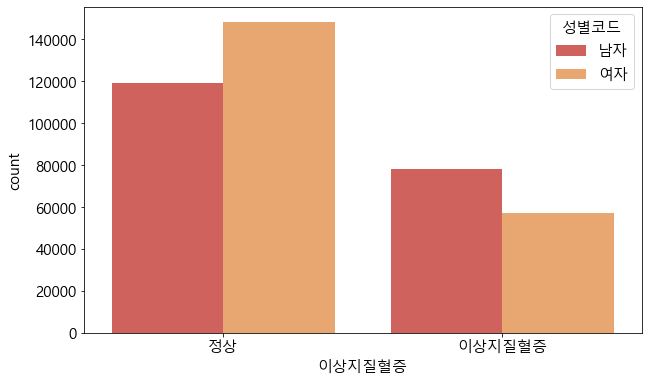

In [236]:
# 성별에 따른 이상 지질 혈증 
# 여성의 경우 이상지질혈증검측 수가 남성보다 많다는 것을 알 수 있다. 

print("""
이상지질혈증은 남성이 더 많이 진단받는 것을 알 수 있다. 

""")
plt.rc('font', size=15) 
df['이상지질혈증']=df['이상지질혈증'].replace('검측결과 없음',np.NaN)
sns.countplot(x="이상지질혈증", hue="성별코드", data=df)
plt.show()

In [219]:
# 성별 이상지지혈증 비율 
sns.set_palette('Spectral')
col_male = df[df['성별코드']=='여자'].groupby('이상지질혈증').count()
col_female = df[df['성별코드']=='남자'].groupby('이상지질혈증').count()
# 남성 // 이상지질혈증 57064 // 정상 148148
# 여성 // 이상지질혈증 77920 // 정상 119207

고지혈증_여성 = col_female/col_female['기준년도'].sum()*100
고지혈증_남성 =col_male/col_male['기준년도'].sum()*100


여성 정상 60.5% 비정상 39.5%
남성 정상 72.2% 비정상 27.8%

남성 중 이상지질혈증의 비율이 여성보다 높다는 것을 알 수 있다.  




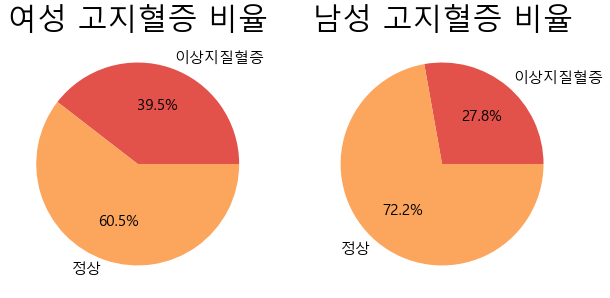

In [237]:
# 여성의 절대적인 수치와 비율이 남성보다 높다는 것을 알 수 있다.  
print("""
여성 정상 60.5% 비정상 39.5%
남성 정상 72.2% 비정상 27.8%

남성 중 이상지질혈증의 비율이 여성보다 높다는 것을 알 수 있다.  

""")


index = np.arange(2)
plt.subplot(1,2,1)
plt.title('여성 고지혈증 비율', size = 30)

p1= plt.pie(고지혈증_여성['기준년도'], labels= 고지혈증_여성.index, autopct='%.1f%%', textprops={'fontsize': 15})
plt.subplot(1,2,2)
plt.title('남성 고지혈증 비율', size = 30)
p2 =plt.pie(고지혈증_남성['기준년도'], labels= 고지혈증_남성.index, autopct='%.1f%%',  textprops={'fontsize': 15})

## 성별에 따른 이상지질혈증 4개 지표 비교

- LDL 콜레스테롤
- 중성지방
- 총 콜레스테롤
- HDL 콜레스테롤 
순으로 성별에 따른 수치를 확인한다. 


### 성별에 따른 LDL 
- 평균값이 큰 차이가 나지는 않지만 여성의 경우  다소 높은 경향을 보인다. 
- LDL 콜레스테롤의 경우 남성과 여성 동일하게 LDL 관리를 하는 것을 추천한다. 

- 다만, 이상지질혈증을 가진 대상에 한해서 성별에 따른 LDL 통계에서 성별 차이가 유의미하게 보인다
- 이상지질혈증을 가진 여성의 LDL 평균이 남성에 비해 약 12% 높은 수치를 보인다, 
- 이는 남성의 경우 다른 요소에서 이상지질혈증 진단을 더 받은 것을 나타낸다. 




- 평균값이 큰 차이가 나지는 않지만 여성의 경우  다소 높은 경향을 보인다. 
- LDL 콜레스테롤의 경우 남성과 여성 동일하게 LDL 관리를 하는 것을 추천한다. 

- 다만, 이상지질혈증을 가진 대상에 한해서 성별에 따른 LDL 통계에서 성별 차이가 유의미하게 보인다
- 이상지질혈증을 가진 여성의 LDL 평균이 남성에 비해 약 12% 높은 수치를 보인다, 
- 이는 남성의 경우 다른 요소에서 이상지질혈증 진단을 더 받은 것을 나타낸다. 




LDL 콜레스테롤                            
           min        mean     max   count
성별코드                                      
남자         1.0  113.835729  2162.0  190862
여자         1.0  117.687160  2395.0  203609

LDL 콜레스테롤
성별코드 이상지질혈증            
남자   이상지질혈증  127.251824
     정상      105.740133
여자   이상지질혈증  147.777918
     정상      106.403329

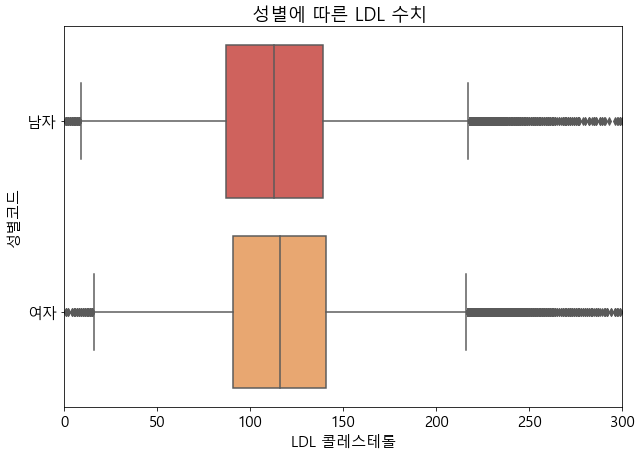

In [240]:
print("""

- 평균값이 큰 차이가 나지는 않지만 여성의 경우  다소 높은 경향을 보인다. 
- LDL 콜레스테롤의 경우 남성과 여성 동일하게 LDL 관리를 하는 것을 추천한다. 

- 다만, 이상지질혈증을 가진 대상에 한해서 성별에 따른 LDL 통계에서 성별 차이가 유의미하게 보인다
- 이상지질혈증을 가진 여성의 LDL 평균이 남성에 비해 약 12% 높은 수치를 보인다, 
- 이는 남성의 경우 다른 요소에서 이상지질혈증 진단을 더 받은 것을 나타낸다. 

""")

plt.figure(figsize=(10, 7))
ldl_s=df.groupby(["성별코드"])[["LDL 콜레스테롤"]].agg(["min", "mean", "max", "count"])
display(ldl_s)

display(df.groupby(['성별코드','이상지질혈증'])['LDL 콜레스테롤'].mean().to_frame())

sns.boxplot( y ="성별코드", x="LDL 콜레스테롤" , data=df)
plt.xlim(0, 300)
plt.title("성별에 따른 LDL 수치 ")



plt.show()

### 성별에 따른 중성지방 수치 

- 평균적으로 남성이 여성보다 많은 중성지방을 가지고있다. (남성의 수치가 여성의 135%) 
- 이상지질혈증에 걸린 수진자를 대상으로 봤을때, 여성 이상지질혈증의 중성지방의 평균이 기준치인 200을 크게 하회한다. 이는 여성 이상지질혈증 환자의 경우 다른 지표로 인해 이상지질혈증 진단을 받았음을 알 수 있다. 
- 남성의 경우 중성지방 관리가 더 중요한 것으로 보인다. 

<br>


- 평균적으로 남성이 여성보다 많은 중성지방을 가지고있다. (남성의 수치가 여성의 135%) 
- 이상지질혈증에 걸린 수진자를 대상으로 봤을때, 여성 이상지질혈증의 중성지방의 평균이 기준치인 200을 크게 하회한다. 이는 여성 이상지질혈증 환자의 경우 다른 지표로 인해 이상지질혈증 진단을 받았음을 알 수 있다. 
- 남성의 경우 중성지방 관리가 더 중요한 것으로 보인다. 




트리글리세라이드                            
          min        mean     max   count
성별코드                                     
남자        4.0  153.594076  5869.0  197121
여자        2.0  114.858434  6999.0  205201

트리글리세라이드
성별코드 이상지질혈증            
남자   이상지질혈증  224.495252
     정상      107.246985
여자   이상지질혈증  165.685995
     정상       95.279099

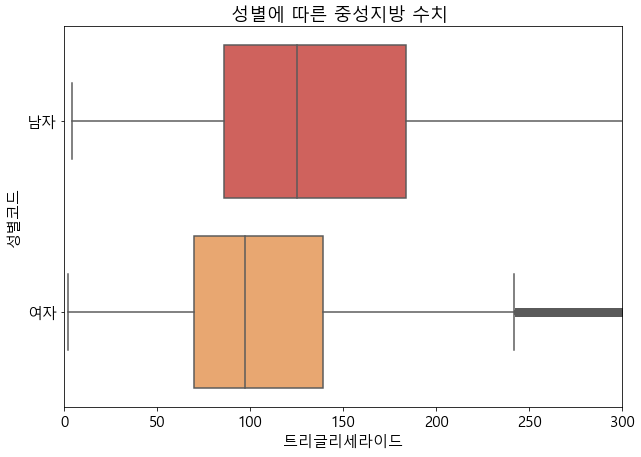

6999.0

In [242]:
# 성별에 따른 중성지방  수치 

print("""
- 평균적으로 남성이 여성보다 많은 중성지방을 가지고있다. (남성의 수치가 여성의 135%) 
- 이상지질혈증에 걸린 수진자를 대상으로 봤을때, 여성 이상지질혈증의 중성지방의 평균이 기준치인 200을 크게 하회한다. 이는 여성 이상지질혈증 환자의 경우 다른 지표로 인해 이상지질혈증 진단을 받았음을 알 수 있다. 
- 남성의 경우 중성지방 관리가 더 중요한 것으로 보인다. 

""")
nf_s=df.groupby(["성별코드"])[["트리글리세라이드"]].agg(["min", "mean", "max", "count"])
display(nf_s)

display(df.groupby(['성별코드','이상지질혈증'])['트리글리세라이드'].mean().to_frame())

# 남성의 중성지방 평균치가 여성보다 월등히 높으며, 
plt.figure(figsize=(10, 7))
sns.boxplot( y ="성별코드", x="트리글리세라이드" , data=df)
plt.xlim(0, 300)
plt.title("성별에 따른 중성지방 수치 ")
plt.show()
df['트리글리세라이드'].max()

### 성별에 따른 총콜레스테롤 수치 
- 평균적으로 여성이 남성보다 총콜레스테롤을 많이 지녔다. 
- 하지만 남녀 모두 총콜레스테롤 위험수준 기준치인 240을 크게하회하고 있다. 
- 이상지질혈증 진단을 받은 자의 총콜레스테롤 수치는 남녀 모두 기준치를 하회하고 있다. 
- 총콜레스테롤 외에도 다른 분야에서 이상지질혈증의 판단을 받는 경우가 다수있다는 것을 의미한다. 

<br>



- 평균적으로 여성이 남성보다 총콜레스테롤을 많이 지녔다. 
- 하지만 남녀 모두 총콜레스테롤 위험수준 기준치인 240을 크게하회하고 있다. 
- 이상지질혈증 진단을 받은 자의 총콜레스테롤 수치는 남녀 모두 기준치를 하회하고 있다. 
- 총콜레스테롤 외에도 다른 분야에서 이상지질혈증의 판단을 받는 경우가 다수있다는 것을 의미한다. 



총 콜레스테롤                            
         min        mean     max   count
성별코드                                    
남자      54.0  195.263358  2193.0  197112
여자      54.0  201.526282  2416.0  205194

총 콜레스테롤
성별코드 이상지질혈증            
남자   이상지질혈증  214.272534
     정상      182.837183
여자   이상지질혈증  236.758013
     정상      187.954980

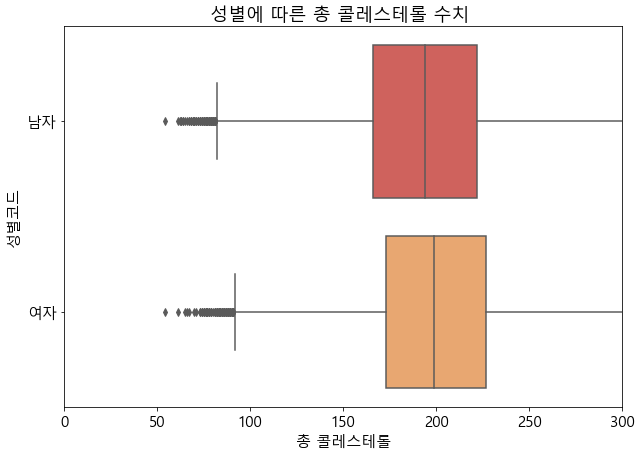

In [243]:
# 성별에 따른 총콜레스테롤  수치 

print("""
- 평균적으로 여성이 남성보다 총콜레스테롤을 많이 지녔다. 
- 하지만 남녀 모두 총콜레스테롤 위험수준 기준치인 240을 크게하회하고 있다. 
- 이상지질혈증 진단을 받은 자의 총콜레스테롤 수치는 남녀 모두 기준치를 하회하고 있다. 
- 총콜레스테롤 외에도 다른 분야에서 이상지질혈증의 판단을 받는 경우가 다수있다는 것을 의미한다. 
""")

nf_s=df.groupby(["성별코드"])[["총 콜레스테롤"]].agg(["min", "mean", "max", "count"])
display(nf_s)

display(df.groupby(['성별코드','이상지질혈증'])['총 콜레스테롤'].mean().to_frame())

# 남성의 중성지방 평균치가 여성보다 월등히 높으며, 
plt.figure(figsize=(10, 7))
sns.boxplot( y ="성별코드", x="총 콜레스테롤" , data=df)
plt.xlim(0, 300)
plt.title("성별에 따른 총 콜레스테롤 수치 ")
plt.show()


### 성별에 따른 HDL 수치 

- 평균적으로 여성이 남성보다 HDL을 더 많이 지녔다. 
- 권장하는 HDL 기준치가 60 이상인것에 비해, 남성의 경우 권장 수치를 저하(평균 52)함으로 남성의 경우 HDL 관리가 더 필요하다. 
- 여성이 남성보다 콜레스테롤을 더 잘 제거할 것으로 보인다. 
- HDL은 남성과 여성모두 이상지질혈증을 가졌음에도 평균적으로 높은 HDL 수치를 지녔다. 
- HDL이 높아도, 다른 수치로인해 고지혈증이 나타날 수 있다. 
- HDL이 콜레스테롤을 청소하는 기능을 지녔어도, 과다한 콜레스테롤로 인해 이상지질혈증에 걸릴 수 있다. 




- 평균적으로 여성이 남성보다 HDL을 더 많이 지녔다. 
- 권장하는 HDL 기준치가 60 이상인것에 비해, 남성의 경우 권장 수치를 저하(평균 52)함으로 남성의 경우 HDL 관리가 더 필요하다. 
- 여성이 남성보다 콜레스테롤을 더 잘 제거할 것으로 보인다. 
- HDL은 남성과 여성모두 이상지질혈증을 가졌음에도 평균적으로 높은 HDL 수치를 지녔다. 
- HDL이 높아도, 다른 수치로인해 고지혈증이 나타날 수 있다. 
- HDL이 콜레스테롤을 청소하는 기능을 지녔어도, 과다한 콜레스테롤로 인해 이상지질혈증에 걸릴 수 있다. 




HDL 콜레스테롤                          
           min       mean    max   count
성별코드                                    
남자         2.0  52.228774  783.0  197117
여자         1.0  61.131766  960.0  205198

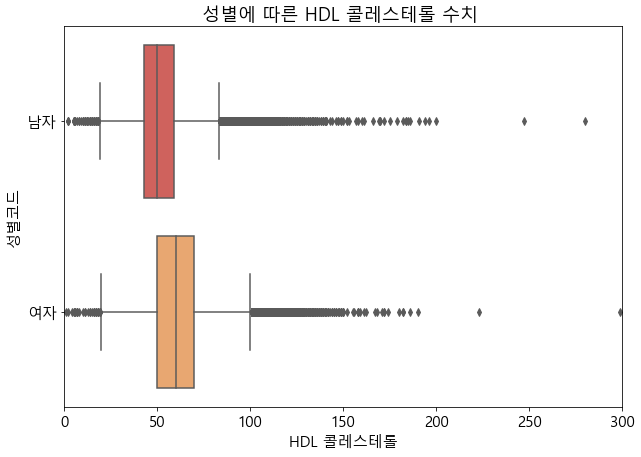

In [257]:
# 성별에 따른  HDL 수치  수치 
print("""

- 평균적으로 여성이 남성보다 HDL을 더 많이 지녔다. 
- 권장하는 HDL 기준치가 60 이상인것에 비해, 남성의 경우 권장 수치를 저하(평균 52)함으로 남성의 경우 HDL 관리가 더 필요하다. 
- 여성이 남성보다 콜레스테롤을 더 잘 제거할 것으로 보인다. 
- HDL은 남성과 여성모두 이상지질혈증을 가졌음에도 평균적으로 높은 HDL 수치를 지녔다. 
- HDL이 높아도, 다른 수치로인해 고지혈증이 나타날 수 있다. 
- HDL이 콜레스테롤을 청소하는 기능을 지녔어도, 과다한 콜레스테롤로 인해 이상지질혈증에 걸릴 수 있다. 

""")
nf_s=df.groupby(["성별코드"])[["HDL 콜레스테롤"]].agg(["min", "mean", "max", "count"])
display(nf_s)

# 남성의 중성지방 평균치가 여성보다 월등히 높으며, 
plt.figure(figsize=(10, 7))
sns.boxplot( y ="성별코드", x="HDL 콜레스테롤" , data=df)
plt.xlim(0, 300)
plt.title("성별에 따른 HDL 콜레스테롤 수치 ")
plt.show()



- HDL 수치 40미만인 사람들에 대한 분석 
    - HDL을 통해 이상지질혈증 진단을 받은 사람들의 HDL 콜레스테롤 수치는 남녀 상관없이 평균이 35 수준에 머무른다.
    - HDL이 부족한 사람의 경우, 여성 남성에 차이가 없다. 
    - HDL 
여성의 평균이 남성의 평균보다 높다는 것을 알 수 있다. 




,HDL 콜레스테롤
성별코드,
남자,35.190378
여자,35.444218


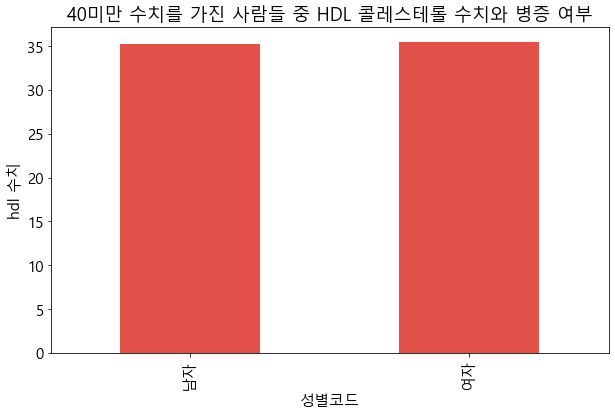

In [261]:
print("""
- HDL 수치 40미만인 사람들에 대한 분석 
    - HDL을 통해 이상지질혈증 진단을 받은 사람들의 HDL 콜레스테롤 수치는 남녀 상관없이 평균이 35 수준에 머무른다.
    - HDL이 부족한 사람의 경우, 여성 남성에 차이가 없다. 
    - HDL 
여성의 평균이 남성의 평균보다 높다는 것을 알 수 있다. 

""")

cot =df[df['HDL 콜레스테롤']<40].groupby('성별코드')['HDL 콜레스테롤'].mean()
plt.title('40미만 수치를 가진 사람들 중 HDL 콜레스테롤 수치와 병증 여부')
plt.ylabel('hdl 수치')
display(cot.to_frame())
cot.plot(kind='bar')
plt.show()

## 연령대에 따른 이상지질혈증 

### 연령대에 따른 이상지질혈증 비율 확인

- 연령대별 비율 
- 절대적인 수는 60-64세, 40-44세 순으로 가장 많았고, 고연령으로 갈 수록 이상지질혈증 진단이 감소했다.
- 연령별 비율로보아도 85세 이상의 이상지질혈증 환자가 가장 낮은 비율을 차지했으나, 80-84세의 경우 평균치인 (12.8%)를 크게상회하는 (16.8%)의 비율로 이상지질혈증 진단을 받았다. 
- 연령별 진단 비율은 60-64세 , 40-44 세,80-84세 순으로 이상지질혈증 환자가 많았다. 



In [262]:
df.groupby(["연령대 코드(5세단위)"])[["이상지질혈증"]].count().sum()

이상지질혈증    402339
dtype: int64

In [263]:
fat_chart= df[df['이상지질혈증']=='이상지질혈증'].groupby('연령대 코드(5세단위)')['기준년도'].count()



- 연령대별 비율 
- 절대적인 수는 60-64세, 40-44세 순으로 가장 많았고, 고연령으로 갈 수록 이상지질혈증 진단이 감소했다.
- 연령별 비율로보아도 85세 이상의 이상지질혈증 환자가 가장 낮은 비율을 차지했으나, 80-84세의 경우 평균치인 (12.8%)를 크게상회하는 (16.8%)의 비율로 이상지질혈증 진단을 받았다. 
- 연령별 진단 비율은 60-64세 , 40-44 세,80-84세 순으로 이상지질혈증 환자가 많았다. 



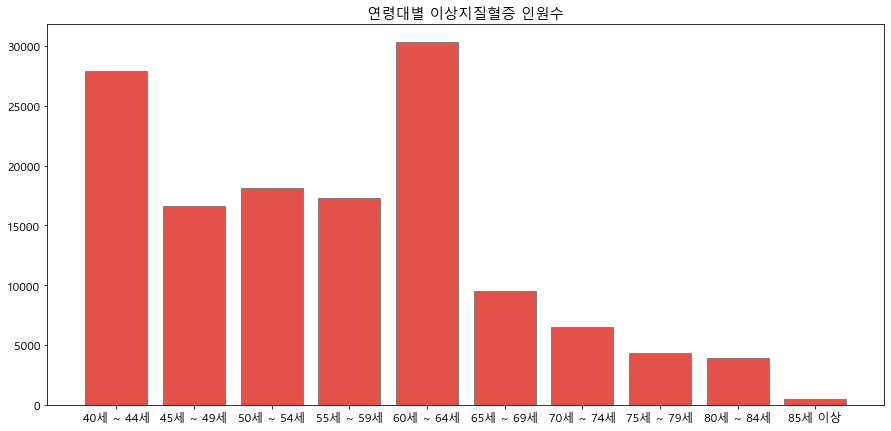

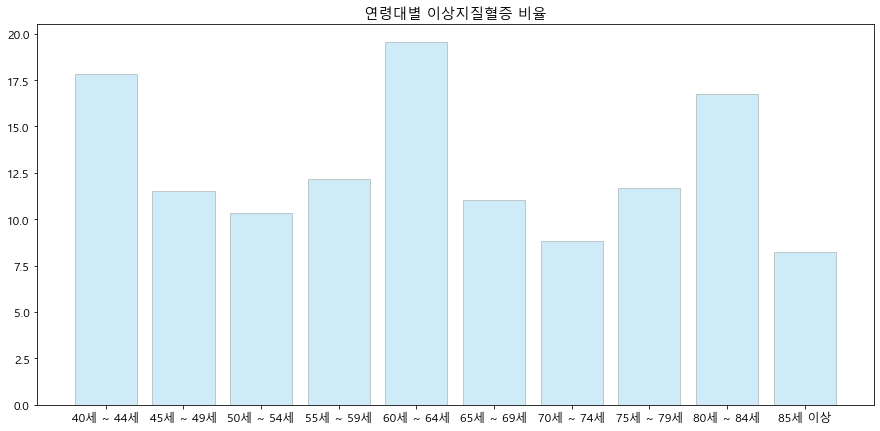

In [268]:
# 이상 지질혈증 ( 연령별 )
# 60~64세에서 가장 많이 증상을 보인다는 것을 알 수 있다. 

print("""
- 연령대별 비율 
- 절대적인 수는 60-64세, 40-44세 순으로 가장 많았고, 고연령으로 갈 수록 이상지질혈증 진단이 감소했다.
- 연령별 비율로보아도 85세 이상의 이상지질혈증 환자가 가장 낮은 비율을 차지했으나, 80-84세의 경우 평균치인 (12.8%)를 크게상회하는 (16.8%)의 비율로 이상지질혈증 진단을 받았다. 
- 연령별 진단 비율은 60-64세 , 40-44 세,80-84세 순으로 이상지질혈증 환자가 많았다. 
""")

plt.figure(figsize=(15, 7))
plt.rc('font', size=12) 
plt.bar(fat_chart.index , fat_chart,   edgecolor='gray')
plt.title("연령대별 이상지질혈증 인원수")
plt.show()

fat2= fat_chart
fat3=fat2/df.groupby('연령대 코드(5세단위)')['시도코드'].count()*100
plt.figure(figsize=(15, 7))
plt.bar( fat3.index , fat3 , color ='skyblue',alpha=0.4, edgecolor='gray')
plt.title("연령대별 이상지질혈증 비율")
plt.show()

###  연령대에 따른 이상지질혈증 4가지 지표 확인 

- 연령대별로 이상지질혈증 검진 지표의 변화를 알아본다
    - 전반적으로 연령이 증가할 수록 지표가 낮아진다는 것을 알 수 있다. 
    - 60-64세에서 65-69세를 지나가며 지표들이 유의미하게 낮아진다. 
    - 연령대가 높아질수록 지표의 범주가 넓어진다. 
    
- 연령이 높아질 수록 약 처방등을 통해 건강관리에 신경쓴다는 것을 추론할 수 있다. 
- 연령대별 고지혈증의 비율 또한 60-64에 가장 높은 것을 통해 해당 연령대에 콜레스테롤 검진과 관리를 추천한다.
 <br>
- HDL 콜레스테롤의 경우 연령에 따라 낮아지는 성향이 있음으로 과다 콜레스테롤을 없애는 신체 기능이 연령이 증가할 수록 낮아진다. 
- 고연령의 경우 고지혈증 진단 시 총콜레스테롤뿐만 아닌 HDL, LDL의 수치를 면밀히 확인해야 할 것이다. 




- 연령대별로 이상지질혈증 검진 지표의 변화를 알아본다
    - 전반적으로 연령이 증가할 수록 지표가 낮아진다는 것을 알 수 있다. 
    - 60-64세에서 65-69세를 지나가며 지표들이 유의미하게 낮아진다. 
    - 연령대가 높아질수록 지표의 범주가 넓어진다. 
    
- 연령이 높아질 수록 약 처방등을 통해 건강관리에 신경쓴다는 것을 추론할 수 있다. 
- 연령대별 고지혈증의 비율 또한 60-64에 가장 높은 것을 통해 해당 연령대에 콜레스테롤 검진과 관리를 추천한다.
 <br>
- HDL 콜레스테롤의 경우 연령에 따라 낮아지는 성향이 있음으로 과다 콜레스테롤을 없애는 신체 기능이 연령이 증가할 수록 낮아진다. 
- 고연령의 경우 고지혈증 진단 시 총콜레스테롤뿐만 아닌 HDL, LDL의 수치를 면밀히 확인해야 할 것이다. 




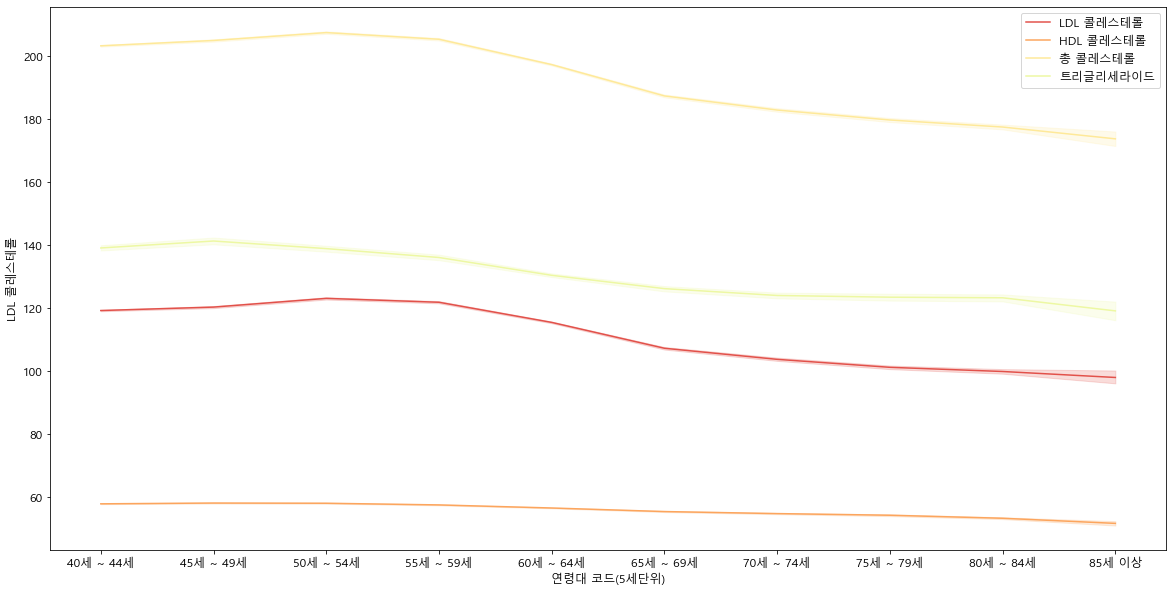

In [269]:
print("""

- 연령대별로 이상지질혈증 검진 지표의 변화를 알아본다
    - 전반적으로 연령이 증가할 수록 지표가 낮아진다는 것을 알 수 있다. 
    - 60-64세에서 65-69세를 지나가며 지표들이 유의미하게 낮아진다. 
    - 연령대가 높아질수록 지표의 범주가 넓어진다. 
    
- 연령이 높아질 수록 약 처방등을 통해 건강관리에 신경쓴다는 것을 추론할 수 있다. 
- 연령대별 고지혈증의 비율 또한 60-64에 가장 높은 것을 통해 해당 연령대에 콜레스테롤 검진과 관리를 추천한다.
 <br>
- HDL 콜레스테롤의 경우 연령에 따라 낮아지는 성향이 있음으로 과다 콜레스테롤을 없애는 신체 기능이 연령이 증가할 수록 낮아진다. 
- 고연령의 경우 고지혈증 진단 시 총콜레스테롤뿐만 아닌 HDL, LDL의 수치를 면밀히 확인해야 할 것이다. 

""")

plt.figure(figsize=(20, 10))

df.sort_values("연령대 코드(5세단위)", inplace=True)


labels = ['LDL 콜레스테롤','HDL 콜레스테롤','총 콜레스테롤','트리글리세라이드']
for _, label in enumerate(labels):
    df_chart = df[df[label].notna()]
    x= '연령대 코드(5세단위)'
    y = df_chart[label]
    sns.lineplot(x=x, y=label, label=label,data=df_chart)

    plt.legend()


## 이상지질혈증 4개 지표 비교 (어떠한 것이 이상지지혈증 검출에 가장 큰 기여를 했는가?)

- 가장 많이 기준치를 넘는 것은 총콜레스테롤이다. 
- 이상지질혈증을 가진 수진자 중 각 검측치가 기준을 넘은 비율 
- 이상지질혈증 환자 중 46.5%의 총 콜레스테롤이 높았으며, 44.4%가 중성지방이 높았다. 
- 이상치 LDL 콜레스테롤을 가진 자는 35.5%이며, 이상치 HDL 콜레스테롤을 가진 자는 28.8%이다.
- 이를통해 HDL, LDL 콜레스테롤 대비 총콜레스테롤과 중성지방의 이상지질혈증 검측 기여도가 높다는 것을
알 수 있다. 
- 총 콜레스테롤은 LDL, HDL, 중성지방을 모두 포함하는 수치로, 이상지질혈증에 포함되는 자는 <br>
전반적인 수치가 좋지 않다는 것을 알 수있다.


[어떠한 것이 이상지지혈증 검출에 가장 큰 기여를 했는가?]

- 가장 많이 기준치를 넘는 것은 총콜레스테롤이다. 
- 이상지질혈증을 가진 수진자 중 각 검측치가 기준을 넘은 비율 
- 이상지질혈증 환자 중 46.5%의 총 콜레스테롤이 높았으며, 44.4%가 중성지방이 높았다. 
- 이상치 LDL 콜레스테롤을 가진 자는 35.5%이며, 이상치 HDL 콜레스테롤을 가진 자는 28.8%이다.
- 이를통해 HDL, LDL 콜레스테롤 대비 총콜레스테롤과 중성지방의 이상지질혈증 검측 기여도가 높다는 것을
알 수 있다. 
- 총 콜레스테롤은 LDL, HDL, 중성지방을 모두 포함하는 수치로, 이상지질혈증에 포함되는 자는 <br>
전반적인 수치가 좋지 않다는 것을 알 수있다.




,0
HDL 콜레스테롤,28.808600
LDL 콜레스테롤,35.481242
총 콜레스테롤,46.469952
중성지방,44.414153


<BarContainer object of 4 artists>

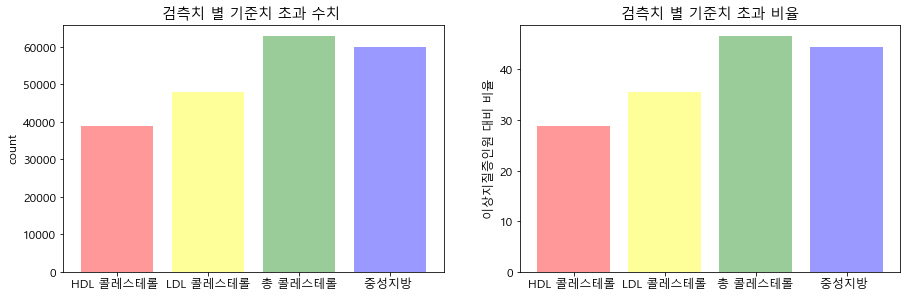

In [275]:
print("""
[어떠한 것이 이상지지혈증 검출에 가장 큰 기여를 했는가?]

- 가장 많이 기준치를 넘는 것은 총콜레스테롤이다. 
- 이상지질혈증을 가진 수진자 중 각 검측치가 기준을 넘은 비율 
- 이상지질혈증 환자 중 46.5%의 총 콜레스테롤이 높았으며, 44.4%가 중성지방이 높았다. 
- 이상치 LDL 콜레스테롤을 가진 자는 35.5%이며, 이상치 HDL 콜레스테롤을 가진 자는 28.8%이다.
- 이를통해 HDL, LDL 콜레스테롤 대비 총콜레스테롤과 중성지방의 이상지질혈증 검측 기여도가 높다는 것을
알 수 있다. 
- 총 콜레스테롤은 LDL, HDL, 중성지방을 모두 포함하는 수치로, 이상지질혈증에 포함되는 자는 <br>
전반적인 수치가 좋지 않다는 것을 알 수있다.

""")

f_ratio =pd.DataFrame(v2, index = index)
display(f_ratio)

plt.figure(figsize=(15, 10))
num = df[df['이상지질혈증']=='이상지질혈증']['기준년도'].count()
hdl2 = df.loc[df['hdl']>=100,'기준년도'].count()
ldl2  = df.loc[df['ldl']>=100,'기준년도'].count()
sf2 = df.loc[df['sf']>=100,'기준년도'].count()
nf2 = df.loc[df['nf']>=100,'기준년도'].count()


x=np.arange(4)
index=['HDL 콜레스테롤 ', 'LDL 콜레스테롤', '총 콜레스테롤' , '중성지방 ']
values=[hdl2, ldl2, sf2, nf2]
plt.subplot(2,2,1)
plt.title('검측치 별 기준치 초과 수치 ')
plt.ylabel('count')
plt.xticks(x, index)
plt.bar(x, values, color =['red','yellow','green','blue'],alpha=0.4)

hdl3 = df.loc[df['hdl']>=100,'기준년도'].count()/num*100
ldl3  = df.loc[df['ldl']>=100,'기준년도'].count()/num*100
sf3 = df.loc[df['sf']>=100,'기준년도'].count()/num*100
nf3 = df.loc[df['nf']>=100,'기준년도'].count()/num*100
v2=[hdl3, ldl3, sf3, nf3]
v2
plt.subplot(2,2,2)
plt.title('검측치 별 기준치 초과 비율')
plt.ylabel('이상지질증인원 대비 비율')
plt.xticks(x, index)
plt.bar(x, v2, color=['red','yellow','green','blue'],alpha=0.4)


# 요약 및 결론

**<국민건강보험공단 건강검진정보 분석 요약 및 결론>**


건강점진정보에 대한 분석을 총 5가지 비만도 분석, 고혈압 분석, 간기능 이상 분석, 당뇨병 분석, 이상지질혈증 분석로 나눠서 진행하였다. 

<br>
<br>

**1. 비만도 분석**

- 성별과 연령대에 따른 BMI 지수의 평균을 조사한 결과, <br> 40세 부터 69세의 경우, 남성의 BMI가 월등히 높으나, 70세부터 84세의 경우, 여성의 BMI가 남성보다 높게 나타나는 경향을 보였다. 

- 성별과 연령대에 따른 비만도 그룹 비율을 조사한 결과, 
    - 저체중의 경우, 대체적으로 남성이 여성보다 많으며, 40대 초반에서 60대후반까지 감소하는 반면, 70대부터 증가한다. 또한 85세 이상에서 가장 큰 비율을 보인다.
    - 정상체중의 경우, 남성이 여성보다 많으며, 40대 남성의 경우 약 50%가 정상체중을 유지한다. 정상체중의 비율은 연령이 증가함에 따라 감소하며, 남녀의 정상체중 비율의 차이가 줄어든다.
    - 과체중의 경우, 각 연령대의 남녀 비율이 매우 유사하며, 연령이 증가함에 따라 감소한다.
    - 경도 비만의 경우, 40대 초반 남성에 비해 여성이 2배이상 많으며, 70대 초반까지 여성이 남성에 비해 많이 분포해있다. 연령이 증가함에 따라 경도비만의 비율이 감소하며, 남녀의 비율 차이가 줄어든다.
    - 중정도 비만과 고도 비만의 경우, 연령이 증가함에 따라 비율이 감소한다. 이를 통해 여성의 비만도가 대체적으로 높으며, 연령이 낮을수록 비만도가 높음을 알 수 있다.

<br>
<br>

**2. 고혈압 분석**

- 고혈압을 진단되는 검진자는 전체의 약 6.6%이고, 고혈압 의심으로 진단되는 검진자는 57.4%이며, 정상 검진자는 36%이다. 
- 성별에 따른 고혈압을 살펴본 결과, <br> 남성과 여성의 수축기 혈압의 분포는 비슷하나, 이완기는 남성이 여성보다 평균 수치가 높다. 비율을 실펴보면 남성이 여성보다 고혈압 비율이 많다.
- 연령대에 따른 고혈압을 살펴본 결과, <br> 고혈압 의심의 수축기 혈압 기준이 120인데 평균 수치가 모든 연령대에서 120을 넘고 있다. 연령대가 높아질수록 수축기와 이완기의 혈압의 변동성이 커지는 것을 알 수있다. 전체적인 한국인들의 고혈압 관리가 필요하다. 

<br>
<br>

**3. 간 기능 이상 분석**

- 성별에 따른 간 기능 이상 수치를 살펴본 결과, <br> AST와 ALT에서 '경도','중증도','중증' 결과 모두 남성이 여성보다 높게 나타난다. 
- 연령대에 따른 간 기능 이상 수치를 살펴본 결과, <br> 연령별 AST와 ALT 수치는 비슷한 추세를 보인다. AST는 65세부터, ALT는 60세부터 수치가 하락한다. 비율를 비교해본 결과, 전체 검사자 중 AST '경도' 분류 비율은 64세까지 상승하다가 65세 이상부터 하락한다.전체 검사자 중 ALT '경도' 분류 비율은 40세부터 꾸준히 하락한다.
- 성별, 연령대에 따른 간 기능 이상 수치를 살펴본 결과, <br> 남성의 경우 나이가 많아질수록 전체 평균에 가깝게 하락 하는 반면, 여성은 나이가 많아질수록 전체 평균에 가깝게 상승한다.
- 음주 여부에 따른 간 기능 이상을 살펴본 결과, <br> 모든 연령대에서 음주를 하는 사람이 하지 않는 사람보다 AST/ALT 평균 수치가 높게 나타난다.

<br>
<br>

**4. 당뇨병 분석**

- 현재 검진자들의 당뇨병 여부를 살펴보면, 당뇨병인 검진자는 전체의 52%이고, 공복혈당장애인 검진자는 전체의 36.9%이다. 공복혈당장애인 사람들은 1년에 10% 확률로 당뇨병에 걸리기 때문에 주의해야한다.
- 성별에 따른 당뇨병 수치와 비율을 살펴본 결과, <br> 남성의 공복혈당이 여성의 평균 수치보다 높다. 비율을 살펴보면 남성은 당뇨병이 45.1%, 공복혈당장애가 41.1%로 비율이 비슷하지만, 여성은 당뇨병이 59.4%, 공복혈당장애가 32.5%로 당뇨병인 사람이 더 많다.
    - 성별에 따른 공복혈당장애 그룹을 살펴본결과, 남성과 여성의 평균 공복혈당 차이는 거의 없다.
    - 성별에 따른 당뇨병 그룹을 살펴본결과, 당뇨병 그룹의 남성이 평균 공복혈당이 여성보다 높다.
- 연령대에 따른 당뇨병 수치를 살펴본 결과,  나이가 많아짐에 따라 공복혈당 수치가 증가 추세이다. 단 40세부터 79세까지 쭉 증가하다가 80세 이후 줄어드는 것을 알 수 있다.
    - 연령대에 따른 공복혈당장애 그룹을 살펴본결과, 공복혈당장애 그룹의 혈당은 나이가 높아짐에 따라 증가하는 추세를 가진다. 75~79세에서 잠깐 감소하지만 계속 증가한다.
    - 연령대에 따른 당뇨병 그룹을 살펴본결과, 당뇨병 그룹의 40세부터 75~79세까지 공복혈당이 감소하고, 80세부터 다시 증가한다. 공복혈당장애 그룹의 경우는 연령대에 따라 증가하는 모습을 보였지만, 당뇨병 그룹은 감소했다가 증가하는 형상을 보인다. 이를 통해 알 수 있는 것은 당뇨병이 아닌 공복혈당장애 그룹은 혈당 관리를 하지 않지만, 당뇨병 그룹은 혈당 관리를 하는 것으로 보인다.
  
<br>
<br>
  
**5. 이상지질혈증 분석**

- 성별에 따른 이상지질혈증을 살펴보면, 남성이 여성보다 더 많이 진단받는 것을 알 수 있다. 비율을 살펴보면, 남성 중 이상지질혈증의 비율이 여성보다 높다는 것을 알 수 있다.

    - 성별에 따른 LDL 살펴본 결과, 여성의 LDL 평균이 남성에 비해 약 12% 높은 수치를 보인다, 이는 남성의 경우 다른 요소에서 이상지질혈증 진단을 더 받은 것을 나타낸다.

    - 성별에 따른 중성지방 살펴본 결과, 남성의 수치가 여성의 135%로 남성이 여성보다 많은 중성지방을 가지고있다. 이는 여성 이상지질혈증 환자의 경우 다른 지표로 인해 이상지질혈증 진단을 받았음을 알 수 있다.

    - 성별에 따른 총콜레스테롤을 살펴본 결과, 평균적으로 여성이 남성보다 총콜레스테롤을 많이 지녔다. 남성과 여성 모두 총콜레스테롤 외에도 다른 분야에서 이상지질혈증의 판단을 받는 경우가 다수있다는 것을 의미한다.

    -  성별에 따른 HDL 수치를 살펴본 결과, 평균적으로 여성이 남성보다 HDL을 더 많이 지녔다. HDL이 더 많으므로 여성이 남성보다 콜레스테롤을 더 잘 제거할 것으로 보인다.
    
- 연령대에 따른 이상지질혈증을 살펴보면, 절대적인 수는 60-64세, 40-44세 순으로 가장 많았고, 고연령으로 갈 수록 이상지질혈증 진단이 감소했다.비율을 살펴보면, 연령별 진단 비율은 60-64세, 40-44 세,80-84세 순으로 이상지질혈증 환자가 많았다.
  
- 이상지질혈증 4개 지표 비교해보면, 가장 많이 기준치를 넘는 것은 총콜레스테롤이다. 이상지질혈증 환자 중 46.5%의 총 콜레스테롤이 높았으며, 44.4%가 중성지방이 높았다.